### Visualising the data

#### What files are in the input folder:

In [1]:
#install ipywidgets package and run special command before launching jupyter notebook to draw plots

#!pip install ipywidgets
!jupyter nbextension enable --py widgetsnbextension

Enabling notebook extension jupyter-js-widgets/extension...
      - Validating: ok


In [2]:
# All imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import gc


In [3]:
import os 
print('No. of files: {}'.format(str(len(os.listdir("./input")))))
print(os.listdir("./input"))

No. of files: 4
['.~lock.train.csv#', 'sample_submission.csv', 'test.csv', 'train.csv']


##### Train and Test files

In [4]:
#Loading Train and Test Data

df_raw_train = pd.read_csv("./input/train.csv")
df_raw_test = pd.read_csv("./input/test.csv")

df_train = df_raw_train.copy()
df_test = df_raw_test.copy()

print("{} observations and {} features in train set.".format(df_train.shape[0], df_train.shape[1]))
print("{} observations and {} features in test set.".format(df_test.shape[0], df_test.shape[1]))

200000 observations and 202 features in train set.
200000 observations and 201 features in test set.


### Feature Preparation
First of all let's check how many absent values do we have:

In [5]:
null_value_stats = df_train.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Series([], dtype: int64)

Now let's separate features and label variable:

In [6]:
df_train_X = df_train.iloc[:,2:]
df_test_X = df_test.iloc[:,1:]
df_train_y= df_train['target']


In [7]:
print(df_train_X.dtypes)

categorical_features_indices = np.where(df_train_X.dtypes != np.float)[0]

var_0      float64
var_1      float64
var_2      float64
var_3      float64
var_4      float64
var_5      float64
var_6      float64
var_7      float64
var_8      float64
var_9      float64
var_10     float64
var_11     float64
var_12     float64
var_13     float64
var_14     float64
var_15     float64
var_16     float64
var_17     float64
var_18     float64
var_19     float64
var_20     float64
var_21     float64
var_22     float64
var_23     float64
var_24     float64
var_25     float64
var_26     float64
var_27     float64
var_28     float64
var_29     float64
            ...   
var_170    float64
var_171    float64
var_172    float64
var_173    float64
var_174    float64
var_175    float64
var_176    float64
var_177    float64
var_178    float64
var_179    float64
var_180    float64
var_181    float64
var_182    float64
var_183    float64
var_184    float64
var_185    float64
var_186    float64
var_187    float64
var_188    float64
var_189    float64
var_190    float64
var_191    f

### Feature Engineering

In [8]:
import time

def feature_creation(df, idx, name_num = '_1'):
    #data metrics
    print('  * Loading new data metrics: ', name_num)
    df['sum'+name_num] = df[idx].sum(axis=1)  
    df['min'+name_num] = df[idx].min(axis=1)
    df['max'+name_num] = df[idx].max(axis=1)
    df['mean'+name_num] = df[idx].mean(axis=1)
    df['std'+name_num] = df[idx].std(axis=1)
    df['skew'+name_num] = df[idx].skew(axis=1)
    df['kurt'+name_num] = df[idx].kurtosis(axis=1)
    df['med'+name_num] = df[idx].median(axis=1)
    #moving average
    print('  * Loading moving average metric: ', name_num)
    df['ma'+name_num] =  df[idx].apply(lambda x: np.ma.average(x), axis=1)
    #percentiles
    print('  * Loading percentiles: ', name_num)
    #df['perc_1'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 1), axis=1)
    df['perc_5'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 5), axis=1)
    #df['perc_25'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 25), axis=1)
    df['perc_50'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 50), axis=1)
    #df['perc_75'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 75), axis=1)
    df['perc_95'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 95), axis=1)
    #df['perc_99'+name_num] =  df[idx].apply(lambda x: np.percentile(x, 99), axis=1)
    

start_time = time.time()

print('Loading more features for train dataset')
print('Creating Metrics Part 1')
features_1 = df_train_X.columns
feature_creation(df_train_X, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
features_2 = df_train_X.columns #all features included the ones added
feature_creation(df_train_X, features_2, name_num='_2') #adding columns using the train features + the new features

print('-'*50)

print('Loading more features for test dataset')
print('Creating Metrics Part 1')
features_1 = df_test_X.columns
feature_creation(df_test_X, features_1, name_num='_1') #adding columns using the train features (#200)
print('Creating Metrics Part 2')
features_2 = df_test_X.columns #all features included the ones added
feature_creation(df_test_X, features_2, name_num='_2') #adding columns using the train features + the new features


print('Features loaded !')
print("Execution --- %s seconds ---" % (time.time() - start_time))
print('Train df: ', df_train_X.columns)
print('Test df: ', df_test_X.columns)
print('Number of Features: ', len(df_train_X.columns))
print('Number of Features: ', len(df_test_X.columns))


Loading more features for train dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
--------------------------------------------------
Loading more features for test dataset
Creating Metrics Part 1
  * Loading new data metrics:  _1
  * Loading moving average metric:  _1
  * Loading percentiles:  _1
Creating Metrics Part 2
  * Loading new data metrics:  _2
  * Loading moving average metric:  _2
  * Loading percentiles:  _2
Features loaded !
Execution --- 894.1157534122467 seconds ---
Train df:  Index(['var_0', 'var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7',
       'var_8', 'var_9',
       ...
       'max_2', 'mean_2', 'std_2', 'skew_2', 'kurt_2', 'med_2', 'ma_2',
       'perc_5_2', 'perc_50_2', 'perc_95_2'],
      dtype='object', length=224)
Test df:  Index(['var_0', 

In [9]:
df_train_X.drop(['min_2','max_2'],axis=1,inplace=True)
df_test_X.drop(['min_2','max_2'],axis=1,inplace=True)

print(df_train_X.shape)
print(df_test_X.shape)

(200000, 222)
(200000, 222)


In [10]:
categorical_features_indices = np.where(df_train_X.dtypes != np.float)[0]
print(len(categorical_features_indices))

0


### Data Splitting

Let's split the train data into training and validation sets.

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(df_train_X, df_train_y, random_state = 13, test_size = 0.25)

X_test = df_test_X

### CatBoost Basics

In [12]:
from catboost import CatBoostClassifier, Pool, cv
from sklearn.metrics import accuracy_score

In [13]:
model = CatBoostClassifier(custom_loss=['Accuracy'], 
                           random_seed=42, 
                           task_type = "GPU", 
                           devices='0')

In [14]:
model.fit(X_train, y_train, 
          cat_features=categorical_features_indices, 
          eval_set=(X_valid, y_valid),
          logging_level='Verbose',
          plot=True)

Learning rate set to 0.132051


MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.5807081	test: 0.5810565	best: 0.5810565 (0)	total: 76.1ms	remaining: 1m 16s
1:	learn: 0.5006661	test: 0.5017497	best: 0.5017497 (1)	total: 96ms	remaining: 47.9s
2:	learn: 0.4448193	test: 0.4462962	best: 0.4462962 (2)	total: 117ms	remaining: 38.9s
3:	learn: 0.4044203	test: 0.4062156	best: 0.4062156 (3)	total: 138ms	remaining: 34.5s
4:	learn: 0.3761801	test: 0.3784337	best: 0.3784337 (4)	total: 160ms	remaining: 31.8s
5:	learn: 0.3552751	test: 0.3578103	best: 0.3578103 (5)	total: 181ms	remaining: 30s
6:	learn: 0.3402132	test: 0.3429180	best: 0.3429180 (6)	total: 202ms	remaining: 28.7s
7:	learn: 0.3286882	test: 0.3316027	best: 0.3316027 (7)	total: 224ms	remaining: 27.7s
8:	learn: 0.3202993	test: 0.3234605	best: 0.3234605 (8)	total: 245ms	remaining: 27s
9:	learn: 0.3137111	test: 0.3170705	best: 0.3170705 (9)	total: 267ms	remaining: 26.4s
10:	learn: 0.3083460	test: 0.3118114	best: 0.3118114 (10)	total: 289ms	remaining: 26s
11:	learn: 0.3042278	test: 0.3079179	best: 0.3079179 (11)

99:	learn: 0.2336706	test: 0.2443796	best: 0.2443796 (99)	total: 2.19s	remaining: 19.7s
100:	learn: 0.2332749	test: 0.2440386	best: 0.2440386 (100)	total: 2.21s	remaining: 19.6s
101:	learn: 0.2329143	test: 0.2437080	best: 0.2437080 (101)	total: 2.23s	remaining: 19.6s
102:	learn: 0.2325456	test: 0.2434272	best: 0.2434272 (102)	total: 2.25s	remaining: 19.6s
103:	learn: 0.2321487	test: 0.2431178	best: 0.2431178 (103)	total: 2.27s	remaining: 19.5s
104:	learn: 0.2317917	test: 0.2427934	best: 0.2427934 (104)	total: 2.29s	remaining: 19.5s
105:	learn: 0.2314778	test: 0.2425765	best: 0.2425765 (105)	total: 2.31s	remaining: 19.5s
106:	learn: 0.2311024	test: 0.2422991	best: 0.2422991 (106)	total: 2.33s	remaining: 19.4s
107:	learn: 0.2307471	test: 0.2420037	best: 0.2420037 (107)	total: 2.35s	remaining: 19.4s
108:	learn: 0.2303569	test: 0.2417783	best: 0.2417783 (108)	total: 2.37s	remaining: 19.4s
109:	learn: 0.2299635	test: 0.2414982	best: 0.2414982 (109)	total: 2.39s	remaining: 19.3s
110:	learn: 

198:	learn: 0.2069068	test: 0.2255746	best: 0.2255746 (198)	total: 4.27s	remaining: 17.2s
199:	learn: 0.2067222	test: 0.2254415	best: 0.2254415 (199)	total: 4.29s	remaining: 17.2s
200:	learn: 0.2065220	test: 0.2252981	best: 0.2252981 (200)	total: 4.31s	remaining: 17.1s
201:	learn: 0.2063171	test: 0.2251211	best: 0.2251211 (201)	total: 4.33s	remaining: 17.1s
202:	learn: 0.2061068	test: 0.2250204	best: 0.2250204 (202)	total: 4.36s	remaining: 17.1s
203:	learn: 0.2059041	test: 0.2249248	best: 0.2249248 (203)	total: 4.38s	remaining: 17.1s
204:	learn: 0.2056959	test: 0.2248139	best: 0.2248139 (204)	total: 4.4s	remaining: 17.1s
205:	learn: 0.2055074	test: 0.2247061	best: 0.2247061 (205)	total: 4.42s	remaining: 17.1s
206:	learn: 0.2053098	test: 0.2245783	best: 0.2245783 (206)	total: 4.45s	remaining: 17s
207:	learn: 0.2051240	test: 0.2244737	best: 0.2244737 (207)	total: 4.47s	remaining: 17s
208:	learn: 0.2049042	test: 0.2244007	best: 0.2244007 (208)	total: 4.49s	remaining: 17s
209:	learn: 0.204

291:	learn: 0.1916084	test: 0.2175350	best: 0.2175350 (291)	total: 6.33s	remaining: 15.3s
292:	learn: 0.1914753	test: 0.2174700	best: 0.2174700 (292)	total: 6.35s	remaining: 15.3s
293:	learn: 0.1913325	test: 0.2174136	best: 0.2174136 (293)	total: 6.37s	remaining: 15.3s
294:	learn: 0.1912100	test: 0.2173342	best: 0.2173342 (294)	total: 6.39s	remaining: 15.3s
295:	learn: 0.1910891	test: 0.2172751	best: 0.2172751 (295)	total: 6.41s	remaining: 15.3s
296:	learn: 0.1909554	test: 0.2171954	best: 0.2171954 (296)	total: 6.44s	remaining: 15.2s
297:	learn: 0.1908322	test: 0.2171186	best: 0.2171186 (297)	total: 6.46s	remaining: 15.2s
298:	learn: 0.1907059	test: 0.2170530	best: 0.2170530 (298)	total: 6.49s	remaining: 15.2s
299:	learn: 0.1905899	test: 0.2170259	best: 0.2170259 (299)	total: 6.51s	remaining: 15.2s
300:	learn: 0.1904707	test: 0.2169639	best: 0.2169639 (300)	total: 6.53s	remaining: 15.2s
301:	learn: 0.1903212	test: 0.2168887	best: 0.2168887 (301)	total: 6.56s	remaining: 15.2s
302:	learn

384:	learn: 0.1802825	test: 0.2131851	best: 0.2131851 (384)	total: 8.42s	remaining: 13.5s
385:	learn: 0.1801743	test: 0.2131411	best: 0.2131411 (385)	total: 8.45s	remaining: 13.4s
386:	learn: 0.1800806	test: 0.2130877	best: 0.2130877 (386)	total: 8.47s	remaining: 13.4s
387:	learn: 0.1799556	test: 0.2130670	best: 0.2130670 (387)	total: 8.49s	remaining: 13.4s
388:	learn: 0.1798424	test: 0.2130273	best: 0.2130273 (388)	total: 8.51s	remaining: 13.4s
389:	learn: 0.1797224	test: 0.2130077	best: 0.2130077 (389)	total: 8.54s	remaining: 13.4s
390:	learn: 0.1796016	test: 0.2129832	best: 0.2129832 (390)	total: 8.56s	remaining: 13.3s
391:	learn: 0.1795253	test: 0.2129550	best: 0.2129550 (391)	total: 8.58s	remaining: 13.3s
392:	learn: 0.1794155	test: 0.2129046	best: 0.2129046 (392)	total: 8.6s	remaining: 13.3s
393:	learn: 0.1793208	test: 0.2128618	best: 0.2128618 (393)	total: 8.62s	remaining: 13.3s
394:	learn: 0.1792267	test: 0.2128415	best: 0.2128415 (394)	total: 8.64s	remaining: 13.2s
395:	learn:

476:	learn: 0.1711319	test: 0.2107839	best: 0.2107839 (476)	total: 10.5s	remaining: 11.5s
477:	learn: 0.1710255	test: 0.2107538	best: 0.2107538 (477)	total: 10.5s	remaining: 11.4s
478:	learn: 0.1709104	test: 0.2107450	best: 0.2107450 (478)	total: 10.5s	remaining: 11.4s
479:	learn: 0.1708097	test: 0.2107322	best: 0.2107322 (479)	total: 10.5s	remaining: 11.4s
480:	learn: 0.1707105	test: 0.2107044	best: 0.2107044 (480)	total: 10.5s	remaining: 11.4s
481:	learn: 0.1706410	test: 0.2106965	best: 0.2106965 (481)	total: 10.6s	remaining: 11.4s
482:	learn: 0.1705447	test: 0.2106932	best: 0.2106932 (482)	total: 10.6s	remaining: 11.3s
483:	learn: 0.1704518	test: 0.2106594	best: 0.2106594 (483)	total: 10.6s	remaining: 11.3s
484:	learn: 0.1703791	test: 0.2106470	best: 0.2106470 (484)	total: 10.6s	remaining: 11.3s
485:	learn: 0.1702961	test: 0.2106214	best: 0.2106214 (485)	total: 10.6s	remaining: 11.3s
486:	learn: 0.1701780	test: 0.2105965	best: 0.2105965 (486)	total: 10.7s	remaining: 11.2s
487:	learn

571:	learn: 0.1629624	test: 0.2091249	best: 0.2091249 (571)	total: 12.5s	remaining: 9.37s
572:	learn: 0.1628701	test: 0.2090908	best: 0.2090908 (572)	total: 12.5s	remaining: 9.34s
573:	learn: 0.1627693	test: 0.2090849	best: 0.2090849 (573)	total: 12.6s	remaining: 9.32s
574:	learn: 0.1626997	test: 0.2090752	best: 0.2090752 (574)	total: 12.6s	remaining: 9.3s
575:	learn: 0.1626292	test: 0.2090689	best: 0.2090689 (575)	total: 12.6s	remaining: 9.27s
576:	learn: 0.1625386	test: 0.2090613	best: 0.2090613 (576)	total: 12.6s	remaining: 9.25s
577:	learn: 0.1624661	test: 0.2090340	best: 0.2090340 (577)	total: 12.6s	remaining: 9.23s
578:	learn: 0.1623723	test: 0.2090122	best: 0.2090122 (578)	total: 12.7s	remaining: 9.21s
579:	learn: 0.1622788	test: 0.2089925	best: 0.2089925 (579)	total: 12.7s	remaining: 9.18s
580:	learn: 0.1622115	test: 0.2090157	best: 0.2089925 (579)	total: 12.7s	remaining: 9.16s
581:	learn: 0.1621433	test: 0.2090156	best: 0.2089925 (579)	total: 12.7s	remaining: 9.14s
582:	learn:

664:	learn: 0.1556807	test: 0.2084386	best: 0.2084169 (657)	total: 14.5s	remaining: 7.33s
665:	learn: 0.1556028	test: 0.2084175	best: 0.2084169 (657)	total: 14.6s	remaining: 7.31s
666:	learn: 0.1555249	test: 0.2084043	best: 0.2084043 (666)	total: 14.6s	remaining: 7.28s
667:	learn: 0.1554299	test: 0.2083958	best: 0.2083958 (667)	total: 14.6s	remaining: 7.26s
668:	learn: 0.1553457	test: 0.2083922	best: 0.2083922 (668)	total: 14.6s	remaining: 7.24s
669:	learn: 0.1552857	test: 0.2083851	best: 0.2083851 (669)	total: 14.7s	remaining: 7.22s
670:	learn: 0.1552128	test: 0.2083670	best: 0.2083670 (670)	total: 14.7s	remaining: 7.2s
671:	learn: 0.1551459	test: 0.2083498	best: 0.2083498 (671)	total: 14.7s	remaining: 7.17s
672:	learn: 0.1550640	test: 0.2083715	best: 0.2083498 (671)	total: 14.7s	remaining: 7.15s
673:	learn: 0.1549907	test: 0.2083737	best: 0.2083498 (671)	total: 14.7s	remaining: 7.13s
674:	learn: 0.1549301	test: 0.2083512	best: 0.2083498 (671)	total: 14.8s	remaining: 7.11s
675:	learn:

763:	learn: 0.1488803	test: 0.2079108	best: 0.2078974 (762)	total: 16.6s	remaining: 5.13s
764:	learn: 0.1488222	test: 0.2079057	best: 0.2078974 (762)	total: 16.6s	remaining: 5.11s
765:	learn: 0.1487466	test: 0.2079182	best: 0.2078974 (762)	total: 16.6s	remaining: 5.09s
766:	learn: 0.1486733	test: 0.2079292	best: 0.2078974 (762)	total: 16.7s	remaining: 5.06s
767:	learn: 0.1486017	test: 0.2078927	best: 0.2078927 (767)	total: 16.7s	remaining: 5.04s
768:	learn: 0.1485559	test: 0.2079024	best: 0.2078927 (767)	total: 16.7s	remaining: 5.02s
769:	learn: 0.1484799	test: 0.2079110	best: 0.2078927 (767)	total: 16.7s	remaining: 5s
770:	learn: 0.1484192	test: 0.2079258	best: 0.2078927 (767)	total: 16.7s	remaining: 4.97s
771:	learn: 0.1483467	test: 0.2079344	best: 0.2078927 (767)	total: 16.8s	remaining: 4.95s
772:	learn: 0.1482901	test: 0.2079351	best: 0.2078927 (767)	total: 16.8s	remaining: 4.93s
773:	learn: 0.1482061	test: 0.2079191	best: 0.2078927 (767)	total: 16.8s	remaining: 4.91s
774:	learn: 0

858:	learn: 0.1426862	test: 0.2075906	best: 0.2075805 (854)	total: 18.7s	remaining: 3.06s
859:	learn: 0.1426309	test: 0.2075800	best: 0.2075800 (859)	total: 18.7s	remaining: 3.04s
860:	learn: 0.1425640	test: 0.2075784	best: 0.2075784 (860)	total: 18.7s	remaining: 3.02s
861:	learn: 0.1424872	test: 0.2075525	best: 0.2075525 (861)	total: 18.7s	remaining: 3s
862:	learn: 0.1424314	test: 0.2075710	best: 0.2075525 (861)	total: 18.8s	remaining: 2.98s
863:	learn: 0.1423788	test: 0.2075684	best: 0.2075525 (861)	total: 18.8s	remaining: 2.95s
864:	learn: 0.1423174	test: 0.2075603	best: 0.2075525 (861)	total: 18.8s	remaining: 2.93s
865:	learn: 0.1422733	test: 0.2075623	best: 0.2075525 (861)	total: 18.8s	remaining: 2.91s
866:	learn: 0.1422252	test: 0.2075668	best: 0.2075525 (861)	total: 18.8s	remaining: 2.89s
867:	learn: 0.1421567	test: 0.2075534	best: 0.2075525 (861)	total: 18.9s	remaining: 2.87s
868:	learn: 0.1421025	test: 0.2075457	best: 0.2075457 (868)	total: 18.9s	remaining: 2.85s
869:	learn: 0

954:	learn: 0.1368438	test: 0.2076159	best: 0.2074855 (886)	total: 20.7s	remaining: 974ms
955:	learn: 0.1367940	test: 0.2076285	best: 0.2074855 (886)	total: 20.7s	remaining: 953ms
956:	learn: 0.1367186	test: 0.2076646	best: 0.2074855 (886)	total: 20.7s	remaining: 931ms
957:	learn: 0.1366618	test: 0.2076722	best: 0.2074855 (886)	total: 20.7s	remaining: 910ms
958:	learn: 0.1365960	test: 0.2076740	best: 0.2074855 (886)	total: 20.8s	remaining: 888ms
959:	learn: 0.1365360	test: 0.2076997	best: 0.2074855 (886)	total: 20.8s	remaining: 866ms
960:	learn: 0.1364784	test: 0.2076990	best: 0.2074855 (886)	total: 20.8s	remaining: 845ms
961:	learn: 0.1364050	test: 0.2076982	best: 0.2074855 (886)	total: 20.8s	remaining: 823ms
962:	learn: 0.1363417	test: 0.2076968	best: 0.2074855 (886)	total: 20.9s	remaining: 801ms
963:	learn: 0.1362801	test: 0.2076637	best: 0.2074855 (886)	total: 20.9s	remaining: 780ms
964:	learn: 0.1362316	test: 0.2076677	best: 0.2074855 (886)	total: 20.9s	remaining: 758ms
965:	learn

In [15]:
y_pred = model.predict_proba(X_valid) # for classifier
print(y_pred[:5])

[[0.99577945 0.00422055]
 [0.76831533 0.23168467]
 [0.98780542 0.01219458]
 [0.86328671 0.13671329]
 [0.67056837 0.32943163]]


In [16]:
from sklearn.metrics import roc_auc_score

roc_test = roc_auc_score(y_valid, y_pred[:, 1:])
print(roc_test)
# 0.8260463378176381  --> train size (10000, 222),iter=2000
# 0.8451537748219334  --> train size (25000, 222),iter=2000
# 0.8730362116927627  --> train size (50000, 222), iter=2000
# 0.880024101333465  --> train size (75000, 222), iter=2000
# 0.8857279408692152  --> train size (100000, 222), iter=2000
# 0.8967894791438368  --> train size (200000, 222),iter=2000

0.8957275816335935


### CatBoost Features
Let's define some params and create Pool for more convenience. It stores all information about dataset (features, labeles, categorical features indices, weights and and much more).

In [17]:
params = {
    'iterations': 800,
    'learning_rate': 0.15,
    'eval_metric': 'Accuracy',
    'random_seed': 42,
    'logging_level': 'Silent',
    'use_best_model': False,
    'task_type': "GPU", 
    'devices': '0'
}
train_pool = Pool(X_train, y_train, cat_features=categorical_features_indices)
valid_pool = Pool(X_valid, y_valid, cat_features=categorical_features_indices)

### Parameters Tuning
It is possible to select optimal number of iterations (boosting steps) by cross-validation and learning curve plots, it is also important to play with some of model parameters, and we would like to pay some special attention to l2_leaf_reg and learning_rate.

In this section, we'll select these parameters using the Scikit-Optimize skopt package.

#### Optimise for accuracy

In [37]:
from sklearn.model_selection import cross_val_score

from skopt.space import Real, Integer
from skopt.utils import use_named_args

space  = [Integer(1, 7, name='depth'),
          Real(0.5, 5, name='l2_leaf_reg', prior='uniform'),
          Real(10**-2, 10**0, "log-uniform", name='learning_rate'),
          #Integer(25, 47, name='max_leaves'),
          #Integer(1, 10, name='min_data_in_leaf')
         ]

model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.3, gpu_cat_features_storage='CpuPinnedMemory', grow_policy='SymmetricTree')

@use_named_args(space)
def objective(**params):
    model.set_params(**params)
    return -np.mean(cross_val_score(model, X_train, y_train, cv=3, n_jobs=-1, scoring="neg_mean_absolute_error"))


In [33]:
model = CatBoostClassifier(
    l2_leaf_reg=1, #params['l2_leaf_reg'],*
    learning_rate=0.21, #params['learning_rate'],*
    depth=3, #int(params['depth']),*
    bagging_temperature=1, #int(params['bagging_temperature']),
    grow_policy = 'Lossguide',
    min_data_in_leaf=1, #int(params['min_data_in_leaf']),
    max_leaves=37, #int(params['max_leaves']),
    random_strength=3,
    iterations=100,
    eval_metric='Accuracy',
    border_count = 64,
    random_seed=42,
    #logging_level='Silent',
    task_type = "GPU",
    devices='0'
)

In [38]:
from skopt import gbrt_minimize 

res_gprt = gbrt_minimize(objective, space, n_calls=30, random_state=0)

"Best score=%.4f" % res_gprt.fun

'Best score=0.0781'

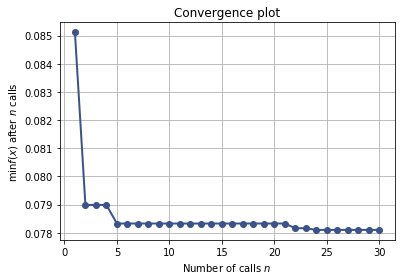

In [41]:
from skopt.plots import plot_convergence

plot_convergence(res_gprt)

In [39]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f""" % (res_gprt.x[0], res_gprt.x[1], res_gprt.x[2]))

Best parameters: - depth=7 - l2_leaf_reg=4.976802 - learning_rate=0.091419


In [40]:
model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.3, gpu_cat_features_storage='CpuPinnedMemory', grow_policy='SymmetricTree', learning_rate=0.091419, l2_leaf_reg=4.976802, depth=7)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

0:	learn: 0.6122102	test: 0.6125534	best: 0.6125534 (0)	total: 32.4ms	remaining: 32.3s
1:	learn: 0.5477351	test: 0.5484946	best: 0.5484946 (1)	total: 57.2ms	remaining: 28.6s
2:	learn: 0.4975975	test: 0.4986886	best: 0.4986886 (2)	total: 80.8ms	remaining: 26.9s
3:	learn: 0.4571811	test: 0.4585772	best: 0.4585772 (3)	total: 102ms	remaining: 25.3s
4:	learn: 0.4255635	test: 0.4271373	best: 0.4271373 (4)	total: 123ms	remaining: 24.5s
5:	learn: 0.4003929	test: 0.4022704	best: 0.4022704 (5)	total: 144ms	remaining: 23.8s
6:	learn: 0.3799402	test: 0.3821857	best: 0.3821857 (6)	total: 165ms	remaining: 23.4s
7:	learn: 0.3640047	test: 0.3665158	best: 0.3665158 (7)	total: 185ms	remaining: 23s
8:	learn: 0.3509633	test: 0.3535744	best: 0.3535744 (8)	total: 206ms	remaining: 22.7s
9:	learn: 0.3403193	test: 0.3431250	best: 0.3431250 (9)	total: 227ms	remaining: 22.5s
10:	learn: 0.3316035	test: 0.3346870	best: 0.3346870 (10)	total: 249ms	remaining: 22.4s
11:	learn: 0.3246218	test: 0.3278680	best: 0.327868

99:	learn: 0.2408554	test: 0.2521191	best: 0.2521191 (99)	total: 2.18s	remaining: 19.6s
100:	learn: 0.2404966	test: 0.2518364	best: 0.2518364 (100)	total: 2.2s	remaining: 19.6s
101:	learn: 0.2400795	test: 0.2514993	best: 0.2514993 (101)	total: 2.22s	remaining: 19.6s
102:	learn: 0.2397116	test: 0.2511679	best: 0.2511679 (102)	total: 2.24s	remaining: 19.5s
103:	learn: 0.2393026	test: 0.2508961	best: 0.2508961 (103)	total: 2.26s	remaining: 19.5s
104:	learn: 0.2389207	test: 0.2506142	best: 0.2506142 (104)	total: 2.28s	remaining: 19.5s
105:	learn: 0.2385667	test: 0.2503672	best: 0.2503672 (105)	total: 2.3s	remaining: 19.4s
106:	learn: 0.2381684	test: 0.2500818	best: 0.2500818 (106)	total: 2.33s	remaining: 19.4s
107:	learn: 0.2377993	test: 0.2497568	best: 0.2497568 (107)	total: 2.35s	remaining: 19.4s
108:	learn: 0.2374397	test: 0.2494758	best: 0.2494758 (108)	total: 2.37s	remaining: 19.4s
109:	learn: 0.2370892	test: 0.2491859	best: 0.2491859 (109)	total: 2.39s	remaining: 19.4s
110:	learn: 0.

194:	learn: 0.2135189	test: 0.2323990	best: 0.2323990 (194)	total: 4.28s	remaining: 17.7s
195:	learn: 0.2132975	test: 0.2322571	best: 0.2322571 (195)	total: 4.31s	remaining: 17.7s
196:	learn: 0.2130761	test: 0.2320925	best: 0.2320925 (196)	total: 4.33s	remaining: 17.7s
197:	learn: 0.2128435	test: 0.2319469	best: 0.2319469 (197)	total: 4.36s	remaining: 17.7s
198:	learn: 0.2126526	test: 0.2318429	best: 0.2318429 (198)	total: 4.38s	remaining: 17.6s
199:	learn: 0.2124411	test: 0.2317086	best: 0.2317086 (199)	total: 4.41s	remaining: 17.6s
200:	learn: 0.2122625	test: 0.2315910	best: 0.2315910 (200)	total: 4.43s	remaining: 17.6s
201:	learn: 0.2120440	test: 0.2314356	best: 0.2314356 (201)	total: 4.46s	remaining: 17.6s
202:	learn: 0.2118310	test: 0.2313188	best: 0.2313188 (202)	total: 4.48s	remaining: 17.6s
203:	learn: 0.2116160	test: 0.2311740	best: 0.2311740 (203)	total: 4.5s	remaining: 17.6s
204:	learn: 0.2114173	test: 0.2310781	best: 0.2310781 (204)	total: 4.53s	remaining: 17.6s
205:	learn:

292:	learn: 0.1958274	test: 0.2224219	best: 0.2224219 (292)	total: 6.55s	remaining: 15.8s
293:	learn: 0.1956944	test: 0.2223351	best: 0.2223351 (293)	total: 6.57s	remaining: 15.8s
294:	learn: 0.1955513	test: 0.2222510	best: 0.2222510 (294)	total: 6.59s	remaining: 15.7s
295:	learn: 0.1954291	test: 0.2221505	best: 0.2221505 (295)	total: 6.61s	remaining: 15.7s
296:	learn: 0.1952833	test: 0.2220590	best: 0.2220590 (296)	total: 6.63s	remaining: 15.7s
297:	learn: 0.1951110	test: 0.2220076	best: 0.2220076 (297)	total: 6.65s	remaining: 15.7s
298:	learn: 0.1949693	test: 0.2219505	best: 0.2219505 (298)	total: 6.67s	remaining: 15.6s
299:	learn: 0.1948226	test: 0.2218847	best: 0.2218847 (299)	total: 6.69s	remaining: 15.6s
300:	learn: 0.1946832	test: 0.2218504	best: 0.2218504 (300)	total: 6.71s	remaining: 15.6s
301:	learn: 0.1945483	test: 0.2217707	best: 0.2217707 (301)	total: 6.74s	remaining: 15.6s
302:	learn: 0.1943893	test: 0.2216987	best: 0.2216987 (302)	total: 6.76s	remaining: 15.5s
303:	learn

388:	learn: 0.1832299	test: 0.2171612	best: 0.2171612 (388)	total: 8.62s	remaining: 13.5s
389:	learn: 0.1831154	test: 0.2171107	best: 0.2171107 (389)	total: 8.63s	remaining: 13.5s
390:	learn: 0.1829953	test: 0.2170940	best: 0.2170940 (390)	total: 8.66s	remaining: 13.5s
391:	learn: 0.1828761	test: 0.2170498	best: 0.2170498 (391)	total: 8.68s	remaining: 13.5s
392:	learn: 0.1827842	test: 0.2170186	best: 0.2170186 (392)	total: 8.7s	remaining: 13.4s
393:	learn: 0.1826731	test: 0.2169633	best: 0.2169633 (393)	total: 8.72s	remaining: 13.4s
394:	learn: 0.1825610	test: 0.2169295	best: 0.2169295 (394)	total: 8.74s	remaining: 13.4s
395:	learn: 0.1824445	test: 0.2168934	best: 0.2168934 (395)	total: 8.76s	remaining: 13.4s
396:	learn: 0.1823180	test: 0.2168425	best: 0.2168425 (396)	total: 8.78s	remaining: 13.3s
397:	learn: 0.1822084	test: 0.2167890	best: 0.2167890 (397)	total: 8.81s	remaining: 13.3s
398:	learn: 0.1820983	test: 0.2167428	best: 0.2167428 (398)	total: 8.83s	remaining: 13.3s
399:	learn:

484:	learn: 0.1729789	test: 0.2139428	best: 0.2139428 (484)	total: 10.7s	remaining: 11.4s
485:	learn: 0.1728940	test: 0.2139062	best: 0.2139062 (485)	total: 10.7s	remaining: 11.3s
486:	learn: 0.1727949	test: 0.2138630	best: 0.2138630 (486)	total: 10.7s	remaining: 11.3s
487:	learn: 0.1727024	test: 0.2138465	best: 0.2138465 (487)	total: 10.8s	remaining: 11.3s
488:	learn: 0.1726058	test: 0.2137991	best: 0.2137991 (488)	total: 10.8s	remaining: 11.3s
489:	learn: 0.1725087	test: 0.2137579	best: 0.2137579 (489)	total: 10.8s	remaining: 11.3s
490:	learn: 0.1724121	test: 0.2137393	best: 0.2137393 (490)	total: 10.8s	remaining: 11.2s
491:	learn: 0.1723332	test: 0.2137307	best: 0.2137307 (491)	total: 10.9s	remaining: 11.2s
492:	learn: 0.1722065	test: 0.2137208	best: 0.2137208 (492)	total: 10.9s	remaining: 11.2s
493:	learn: 0.1721291	test: 0.2136942	best: 0.2136942 (493)	total: 10.9s	remaining: 11.2s
494:	learn: 0.1720167	test: 0.2136694	best: 0.2136694 (494)	total: 10.9s	remaining: 11.1s
495:	learn

581:	learn: 0.1641635	test: 0.2118023	best: 0.2118023 (581)	total: 12.8s	remaining: 9.2s
582:	learn: 0.1640682	test: 0.2117872	best: 0.2117872 (582)	total: 12.8s	remaining: 9.18s
583:	learn: 0.1639931	test: 0.2117706	best: 0.2117706 (583)	total: 12.9s	remaining: 9.16s
584:	learn: 0.1638983	test: 0.2117638	best: 0.2117638 (584)	total: 12.9s	remaining: 9.13s
585:	learn: 0.1638039	test: 0.2117517	best: 0.2117517 (585)	total: 12.9s	remaining: 9.11s
586:	learn: 0.1637155	test: 0.2117498	best: 0.2117498 (586)	total: 12.9s	remaining: 9.09s
587:	learn: 0.1636312	test: 0.2117439	best: 0.2117439 (587)	total: 12.9s	remaining: 9.07s
588:	learn: 0.1635563	test: 0.2117243	best: 0.2117243 (588)	total: 13s	remaining: 9.05s
589:	learn: 0.1634820	test: 0.2117060	best: 0.2117060 (589)	total: 13s	remaining: 9.02s
590:	learn: 0.1633891	test: 0.2116842	best: 0.2116842 (590)	total: 13s	remaining: 9s
591:	learn: 0.1633060	test: 0.2116751	best: 0.2116751 (591)	total: 13s	remaining: 8.98s
592:	learn: 0.1632277	

677:	learn: 0.1565696	test: 0.2104325	best: 0.2104325 (677)	total: 14.9s	remaining: 7.06s
678:	learn: 0.1564893	test: 0.2104335	best: 0.2104325 (677)	total: 14.9s	remaining: 7.04s
679:	learn: 0.1564293	test: 0.2104145	best: 0.2104145 (679)	total: 14.9s	remaining: 7.02s
680:	learn: 0.1563780	test: 0.2104139	best: 0.2104139 (680)	total: 14.9s	remaining: 7s
681:	learn: 0.1562990	test: 0.2104079	best: 0.2104079 (681)	total: 15s	remaining: 6.97s
682:	learn: 0.1562435	test: 0.2103852	best: 0.2103852 (682)	total: 15s	remaining: 6.95s
683:	learn: 0.1561796	test: 0.2103597	best: 0.2103597 (683)	total: 15s	remaining: 6.93s
684:	learn: 0.1560929	test: 0.2103583	best: 0.2103583 (684)	total: 15s	remaining: 6.91s
685:	learn: 0.1560092	test: 0.2103322	best: 0.2103322 (685)	total: 15s	remaining: 6.88s
686:	learn: 0.1559217	test: 0.2103242	best: 0.2103242 (686)	total: 15.1s	remaining: 6.86s
687:	learn: 0.1558785	test: 0.2103159	best: 0.2103159 (687)	total: 15.1s	remaining: 6.84s
688:	learn: 0.1557818	t

770:	learn: 0.1498922	test: 0.2096514	best: 0.2096514 (770)	total: 16.8s	remaining: 4.99s
771:	learn: 0.1498373	test: 0.2096463	best: 0.2096463 (771)	total: 16.8s	remaining: 4.97s
772:	learn: 0.1497526	test: 0.2096145	best: 0.2096145 (772)	total: 16.8s	remaining: 4.95s
773:	learn: 0.1496705	test: 0.2095827	best: 0.2095827 (773)	total: 16.9s	remaining: 4.92s
774:	learn: 0.1496123	test: 0.2095803	best: 0.2095803 (774)	total: 16.9s	remaining: 4.9s
775:	learn: 0.1495301	test: 0.2095681	best: 0.2095681 (775)	total: 16.9s	remaining: 4.88s
776:	learn: 0.1494525	test: 0.2095341	best: 0.2095341 (776)	total: 16.9s	remaining: 4.86s
777:	learn: 0.1493810	test: 0.2095297	best: 0.2095297 (777)	total: 17s	remaining: 4.84s
778:	learn: 0.1493327	test: 0.2095349	best: 0.2095297 (777)	total: 17s	remaining: 4.82s
779:	learn: 0.1492741	test: 0.2095283	best: 0.2095283 (779)	total: 17s	remaining: 4.8s
780:	learn: 0.1492005	test: 0.2095176	best: 0.2095176 (780)	total: 17s	remaining: 4.78s
781:	learn: 0.149127

865:	learn: 0.1435400	test: 0.2087465	best: 0.2087465 (865)	total: 18.9s	remaining: 2.93s
866:	learn: 0.1434576	test: 0.2087387	best: 0.2087387 (866)	total: 18.9s	remaining: 2.9s
867:	learn: 0.1434058	test: 0.2087238	best: 0.2087238 (867)	total: 19s	remaining: 2.88s
868:	learn: 0.1433490	test: 0.2087001	best: 0.2087001 (868)	total: 19s	remaining: 2.86s
869:	learn: 0.1433095	test: 0.2087010	best: 0.2087001 (868)	total: 19s	remaining: 2.84s
870:	learn: 0.1432413	test: 0.2086946	best: 0.2086946 (870)	total: 19s	remaining: 2.81s
871:	learn: 0.1431638	test: 0.2087103	best: 0.2086946 (870)	total: 19s	remaining: 2.79s
872:	learn: 0.1430900	test: 0.2087024	best: 0.2086946 (870)	total: 19.1s	remaining: 2.77s
873:	learn: 0.1430357	test: 0.2086985	best: 0.2086946 (870)	total: 19.1s	remaining: 2.75s
874:	learn: 0.1429761	test: 0.2086781	best: 0.2086781 (874)	total: 19.1s	remaining: 2.73s
875:	learn: 0.1429184	test: 0.2086608	best: 0.2086608 (875)	total: 19.1s	remaining: 2.71s
876:	learn: 0.1428753

962:	learn: 0.1376410	test: 0.2083608	best: 0.2082910 (952)	total: 21s	remaining: 806ms
963:	learn: 0.1375806	test: 0.2083613	best: 0.2082910 (952)	total: 21s	remaining: 784ms
964:	learn: 0.1375356	test: 0.2083537	best: 0.2082910 (952)	total: 21s	remaining: 762ms
965:	learn: 0.1374992	test: 0.2083420	best: 0.2082910 (952)	total: 21s	remaining: 740ms
966:	learn: 0.1374623	test: 0.2083335	best: 0.2082910 (952)	total: 21s	remaining: 718ms
967:	learn: 0.1373815	test: 0.2083342	best: 0.2082910 (952)	total: 21.1s	remaining: 696ms
968:	learn: 0.1373299	test: 0.2083279	best: 0.2082910 (952)	total: 21.1s	remaining: 675ms
969:	learn: 0.1372716	test: 0.2083362	best: 0.2082910 (952)	total: 21.1s	remaining: 653ms
970:	learn: 0.1372205	test: 0.2083461	best: 0.2082910 (952)	total: 21.1s	remaining: 631ms
971:	learn: 0.1371788	test: 0.2083266	best: 0.2082910 (952)	total: 21.1s	remaining: 609ms
972:	learn: 0.1371363	test: 0.2083200	best: 0.2082910 (952)	total: 21.2s	remaining: 587ms
973:	learn: 0.137054

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [50]:
space1  = [Integer(1, 7, name='depth'),
          Real(0.5, 5, name='l2_leaf_reg', prior='uniform'),
          Real(10**-2, 10**0, "log-uniform", name='learning_rate'),
          Integer(25, 47, name='max_leaves'),
          Integer(1, 10, name='min_data_in_leaf')
         ]


@use_named_args(space1)
def objective1(**params):
    
    model1 = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.95, gpu_cat_features_storage='CpuPinnedMemory', iterations=400, eval_metric='AUC', grow_policy='Lossguide', )
    model1.set_params(**params)
    
    cv_data = cv(
        Pool(df_train_X, df_train_y),
        model1.get_params(),
        fold_count=5
    )
    best_auc = np.max(cv_data['test-AUC-mean'])
    
    return 1 - best_auc # as hyperopt minimises

In [51]:

res_gprt1 = gbrt_minimize(objective1, space1, n_calls=10, random_state=0)

"Best score=%.4f" % res_gprt.fun

0:	test: 0.6332775	best: 0.6332775 (0)
1:	test: 0.6754756	best: 0.6754756 (1)
2:	test: 0.7021249	best: 0.7021249 (2)
3:	test: 0.7219768	best: 0.7219768 (3)
4:	test: 0.7397556	best: 0.7397556 (4)
5:	test: 0.7519286	best: 0.7519286 (5)
6:	test: 0.7619110	best: 0.7619110 (6)
7:	test: 0.7709180	best: 0.7709180 (7)
8:	test: 0.7779718	best: 0.7779718 (8)
9:	test: 0.7830800	best: 0.7830800 (9)
10:	test: 0.7882139	best: 0.7882139 (10)
11:	test: 0.7935019	best: 0.7935019 (11)
12:	test: 0.7979706	best: 0.7979706 (12)
13:	test: 0.8022039	best: 0.8022039 (13)
14:	test: 0.8050646	best: 0.8050646 (14)
15:	test: 0.8083012	best: 0.8083012 (15)
16:	test: 0.8117434	best: 0.8117434 (16)
17:	test: 0.8138763	best: 0.8138763 (17)
18:	test: 0.8168348	best: 0.8168348 (18)
19:	test: 0.8193914	best: 0.8193914 (19)
20:	test: 0.8216883	best: 0.8216883 (20)
21:	test: 0.8239286	best: 0.8239286 (21)
22:	test: 0.8257559	best: 0.8257559 (22)
23:	test: 0.8276370	best: 0.8276370 (23)
24:	test: 0.8290795	best: 0.8290795 

352:	test: 0.8560193	best: 0.8645201 (127)
353:	test: 0.8559501	best: 0.8645201 (127)
354:	test: 0.8559537	best: 0.8645201 (127)
355:	test: 0.8559459	best: 0.8645201 (127)
356:	test: 0.8559047	best: 0.8645201 (127)
357:	test: 0.8558945	best: 0.8645201 (127)
358:	test: 0.8558227	best: 0.8645201 (127)
359:	test: 0.8557602	best: 0.8645201 (127)
360:	test: 0.8557031	best: 0.8645201 (127)
361:	test: 0.8557365	best: 0.8645201 (127)
362:	test: 0.8558159	best: 0.8645201 (127)
363:	test: 0.8558626	best: 0.8645201 (127)
364:	test: 0.8558788	best: 0.8645201 (127)
365:	test: 0.8558900	best: 0.8645201 (127)
366:	test: 0.8558908	best: 0.8645201 (127)
367:	test: 0.8558719	best: 0.8645201 (127)
368:	test: 0.8557926	best: 0.8645201 (127)
369:	test: 0.8557116	best: 0.8645201 (127)
370:	test: 0.8556037	best: 0.8645201 (127)
371:	test: 0.8554757	best: 0.8645201 (127)
372:	test: 0.8554754	best: 0.8645201 (127)
373:	test: 0.8554963	best: 0.8645201 (127)
374:	test: 0.8554647	best: 0.8645201 (127)
375:	test: 

0:	test: 0.5495105	best: 0.5495105 (0)
1:	test: 0.5606579	best: 0.5606579 (1)
2:	test: 0.5748641	best: 0.5748641 (2)
3:	test: 0.5986132	best: 0.5986132 (3)
4:	test: 0.6117366	best: 0.6117366 (4)
5:	test: 0.6202724	best: 0.6202724 (5)
6:	test: 0.6248902	best: 0.6248902 (6)
7:	test: 0.6316332	best: 0.6316332 (7)
8:	test: 0.6351045	best: 0.6351045 (8)
9:	test: 0.6372358	best: 0.6372358 (9)
10:	test: 0.6443575	best: 0.6443575 (10)
11:	test: 0.6502771	best: 0.6502771 (11)
12:	test: 0.6547742	best: 0.6547742 (12)
13:	test: 0.6590020	best: 0.6590020 (13)
14:	test: 0.6615473	best: 0.6615473 (14)
15:	test: 0.6662436	best: 0.6662436 (15)
16:	test: 0.6691886	best: 0.6691886 (16)
17:	test: 0.6729002	best: 0.6729002 (17)
18:	test: 0.6765503	best: 0.6765503 (18)
19:	test: 0.6792361	best: 0.6792361 (19)
20:	test: 0.6811071	best: 0.6811071 (20)
21:	test: 0.6854167	best: 0.6854167 (21)
22:	test: 0.6887049	best: 0.6887049 (22)
23:	test: 0.6921971	best: 0.6921971 (23)
24:	test: 0.6949343	best: 0.6949343 

0:	test: 0.6512247	best: 0.6512247 (0)
1:	test: 0.6961097	best: 0.6961097 (1)
2:	test: 0.7235179	best: 0.7235179 (2)
3:	test: 0.7440883	best: 0.7440883 (3)
4:	test: 0.7580707	best: 0.7580707 (4)
5:	test: 0.7684616	best: 0.7684616 (5)
6:	test: 0.7774500	best: 0.7774500 (6)
7:	test: 0.7838991	best: 0.7838991 (7)
8:	test: 0.7909894	best: 0.7909894 (8)
9:	test: 0.7966559	best: 0.7966559 (9)
10:	test: 0.8009762	best: 0.8009762 (10)
11:	test: 0.8052326	best: 0.8052326 (11)
12:	test: 0.8091925	best: 0.8091925 (12)
13:	test: 0.8122646	best: 0.8122646 (13)
14:	test: 0.8149793	best: 0.8149793 (14)
15:	test: 0.8175106	best: 0.8175106 (15)
16:	test: 0.8200454	best: 0.8200454 (16)
17:	test: 0.8220028	best: 0.8220028 (17)
18:	test: 0.8235793	best: 0.8235793 (18)
19:	test: 0.8253531	best: 0.8253531 (19)
20:	test: 0.8273736	best: 0.8273736 (20)
21:	test: 0.8289669	best: 0.8289669 (21)
22:	test: 0.8304134	best: 0.8304134 (22)
23:	test: 0.8316563	best: 0.8316563 (23)
24:	test: 0.8330567	best: 0.8330567 

217:	test: 0.8391476	best: 0.8507249 (65)
218:	test: 0.8391183	best: 0.8507249 (65)
219:	test: 0.8389621	best: 0.8507249 (65)
220:	test: 0.8389590	best: 0.8507249 (65)
221:	test: 0.8389853	best: 0.8507249 (65)
222:	test: 0.8389684	best: 0.8507249 (65)
223:	test: 0.8390001	best: 0.8507249 (65)
224:	test: 0.8389825	best: 0.8507249 (65)
225:	test: 0.8389501	best: 0.8507249 (65)
226:	test: 0.8389614	best: 0.8507249 (65)
227:	test: 0.8389761	best: 0.8507249 (65)
228:	test: 0.8389601	best: 0.8507249 (65)
229:	test: 0.8389877	best: 0.8507249 (65)
230:	test: 0.8390543	best: 0.8507249 (65)
231:	test: 0.8390484	best: 0.8507249 (65)
232:	test: 0.8390893	best: 0.8507249 (65)
233:	test: 0.8390496	best: 0.8507249 (65)
234:	test: 0.8389767	best: 0.8507249 (65)
235:	test: 0.8389432	best: 0.8507249 (65)
236:	test: 0.8390576	best: 0.8507249 (65)
237:	test: 0.8390705	best: 0.8507249 (65)
238:	test: 0.8391800	best: 0.8507249 (65)
239:	test: 0.8392443	best: 0.8507249 (65)
240:	test: 0.8391865	best: 0.85072

0:	test: 0.6062085	best: 0.6062085 (0)
1:	test: 0.6440098	best: 0.6440098 (1)
2:	test: 0.6709839	best: 0.6709839 (2)
3:	test: 0.6896677	best: 0.6896677 (3)
4:	test: 0.7038636	best: 0.7038636 (4)
5:	test: 0.7169856	best: 0.7169856 (5)
6:	test: 0.7298531	best: 0.7298531 (6)
7:	test: 0.7399542	best: 0.7399542 (7)
8:	test: 0.7492482	best: 0.7492482 (8)
9:	test: 0.7569922	best: 0.7569922 (9)
10:	test: 0.7639941	best: 0.7639941 (10)
11:	test: 0.7705988	best: 0.7705988 (11)
12:	test: 0.7760633	best: 0.7760633 (12)
13:	test: 0.7803454	best: 0.7803454 (13)
14:	test: 0.7834462	best: 0.7834462 (14)
15:	test: 0.7873080	best: 0.7873080 (15)
16:	test: 0.7899100	best: 0.7899100 (16)
17:	test: 0.7926953	best: 0.7926953 (17)
18:	test: 0.7955565	best: 0.7955565 (18)
19:	test: 0.7978486	best: 0.7978486 (19)
20:	test: 0.8009902	best: 0.8009902 (20)
21:	test: 0.8034531	best: 0.8034531 (21)
22:	test: 0.8060851	best: 0.8060851 (22)
23:	test: 0.8087656	best: 0.8087656 (23)
24:	test: 0.8112365	best: 0.8112365 

0:	test: 0.6498258	best: 0.6498258 (0)
1:	test: 0.6860557	best: 0.6860557 (1)
2:	test: 0.7102956	best: 0.7102956 (2)
3:	test: 0.7228180	best: 0.7228180 (3)
4:	test: 0.7357360	best: 0.7357360 (4)
5:	test: 0.7444051	best: 0.7444051 (5)
6:	test: 0.7521887	best: 0.7521887 (6)
7:	test: 0.7576878	best: 0.7576878 (7)
8:	test: 0.7638320	best: 0.7638320 (8)
9:	test: 0.7691085	best: 0.7691085 (9)
10:	test: 0.7726910	best: 0.7726910 (10)
11:	test: 0.7769511	best: 0.7769511 (11)
12:	test: 0.7806448	best: 0.7806448 (12)
13:	test: 0.7834039	best: 0.7834039 (13)
14:	test: 0.7861909	best: 0.7861909 (14)
15:	test: 0.7900769	best: 0.7900769 (15)
16:	test: 0.7926635	best: 0.7926635 (16)
17:	test: 0.7958221	best: 0.7958221 (17)
18:	test: 0.7988199	best: 0.7988199 (18)
19:	test: 0.8021363	best: 0.8021363 (19)
20:	test: 0.8047015	best: 0.8047015 (20)
21:	test: 0.8069040	best: 0.8069040 (21)
22:	test: 0.8094785	best: 0.8094785 (22)
23:	test: 0.8117751	best: 0.8117751 (23)
24:	test: 0.8137347	best: 0.8137347 

274:	test: 0.8863342	best: 0.8866201 (273)
275:	test: 0.8864184	best: 0.8866201 (273)
276:	test: 0.8864770	best: 0.8866201 (273)
277:	test: 0.8865245	best: 0.8866201 (273)
278:	test: 0.8865313	best: 0.8866201 (273)
279:	test: 0.8865408	best: 0.8866201 (273)
280:	test: 0.8865528	best: 0.8866201 (273)
281:	test: 0.8865869	best: 0.8866201 (273)
282:	test: 0.8865995	best: 0.8866201 (273)
283:	test: 0.8865833	best: 0.8866201 (273)
284:	test: 0.8865885	best: 0.8866201 (273)
285:	test: 0.8866182	best: 0.8866201 (273)
286:	test: 0.8866422	best: 0.8866422 (286)
287:	test: 0.8866850	best: 0.8866850 (287)
288:	test: 0.8867045	best: 0.8867045 (288)
289:	test: 0.8867302	best: 0.8867302 (289)
290:	test: 0.8867281	best: 0.8867302 (289)
291:	test: 0.8867415	best: 0.8867415 (291)
292:	test: 0.8867930	best: 0.8867930 (292)
293:	test: 0.8867928	best: 0.8867930 (292)
294:	test: 0.8868005	best: 0.8868005 (294)
295:	test: 0.8868283	best: 0.8868283 (295)
296:	test: 0.8868509	best: 0.8868509 (296)
297:	test: 

360:	test: 0.8815666	best: 0.8818806 (317)
361:	test: 0.8815097	best: 0.8818806 (317)
362:	test: 0.8814882	best: 0.8818806 (317)
363:	test: 0.8814592	best: 0.8818806 (317)
364:	test: 0.8814697	best: 0.8818806 (317)
365:	test: 0.8815255	best: 0.8818806 (317)
366:	test: 0.8814844	best: 0.8818806 (317)
367:	test: 0.8814579	best: 0.8818806 (317)
368:	test: 0.8814490	best: 0.8818806 (317)
369:	test: 0.8814526	best: 0.8818806 (317)
370:	test: 0.8814054	best: 0.8818806 (317)
371:	test: 0.8813814	best: 0.8818806 (317)
372:	test: 0.8814293	best: 0.8818806 (317)
373:	test: 0.8814681	best: 0.8818806 (317)
374:	test: 0.8814411	best: 0.8818806 (317)
375:	test: 0.8814512	best: 0.8818806 (317)
376:	test: 0.8814237	best: 0.8818806 (317)
377:	test: 0.8814388	best: 0.8818806 (317)
378:	test: 0.8814359	best: 0.8818806 (317)
379:	test: 0.8814232	best: 0.8818806 (317)
380:	test: 0.8814168	best: 0.8818806 (317)
381:	test: 0.8814647	best: 0.8818806 (317)
382:	test: 0.8814644	best: 0.8818806 (317)
383:	test: 

0:	test: 0.5880983	best: 0.5880983 (0)
1:	test: 0.6189442	best: 0.6189442 (1)
2:	test: 0.6404849	best: 0.6404849 (2)
3:	test: 0.6526854	best: 0.6526854 (3)
4:	test: 0.6700739	best: 0.6700739 (4)
5:	test: 0.6827442	best: 0.6827442 (5)
6:	test: 0.6936763	best: 0.6936763 (6)
7:	test: 0.7008620	best: 0.7008620 (7)
8:	test: 0.7069428	best: 0.7069428 (8)
9:	test: 0.7150028	best: 0.7150028 (9)
10:	test: 0.7192854	best: 0.7192854 (10)
11:	test: 0.7250279	best: 0.7250279 (11)
12:	test: 0.7314496	best: 0.7314496 (12)
13:	test: 0.7381950	best: 0.7381950 (13)
14:	test: 0.7428818	best: 0.7428818 (14)
15:	test: 0.7492383	best: 0.7492383 (15)
16:	test: 0.7533445	best: 0.7533445 (16)
17:	test: 0.7578122	best: 0.7578122 (17)
18:	test: 0.7608057	best: 0.7608057 (18)
19:	test: 0.7632863	best: 0.7632863 (19)
20:	test: 0.7669642	best: 0.7669642 (20)
21:	test: 0.7693231	best: 0.7693231 (21)
22:	test: 0.7727870	best: 0.7727870 (22)
23:	test: 0.7754671	best: 0.7754671 (23)
24:	test: 0.7782251	best: 0.7782251 

'Best score=0.0781'

In [54]:
print("""Best parameters: - depth=%d - l2_leaf_reg=%.6f - learning_rate=%.6f - max_leaves=%d - min_data_in_leaf=%d""" % (res_gprt1.x[0], res_gprt1.x[1], res_gprt1.x[2], res_gprt1.x[3], res_gprt1.x[4]))

Best parameters: - depth=7 - l2_leaf_reg=3.742847 - learning_rate=0.145895 - max_leaves=25 - min_data_in_leaf=5


In [55]:
model = CatBoostClassifier(task_type = "GPU", devices='0', gpu_ram_part=0.95, gpu_cat_features_storage='CpuPinnedMemory', iterations=3000, eval_metric='AUC', grow_policy='Lossguide', learning_rate=0.145895 , l2_leaf_reg=3.742847, depth=7, max_leaves=25, min_data_in_leaf=5)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

0:	learn: 0.6576854	test: 0.6465946	best: 0.6465946 (0)	total: 50.8ms	remaining: 2m 32s
1:	learn: 0.7010934	test: 0.6926420	best: 0.6926420 (1)	total: 100ms	remaining: 2m 30s
2:	learn: 0.7263153	test: 0.7160925	best: 0.7160925 (2)	total: 147ms	remaining: 2m 26s
3:	learn: 0.7423391	test: 0.7312135	best: 0.7312135 (3)	total: 195ms	remaining: 2m 26s
4:	learn: 0.7520926	test: 0.7399361	best: 0.7399361 (4)	total: 242ms	remaining: 2m 24s
5:	learn: 0.7610832	test: 0.7464434	best: 0.7464434 (5)	total: 291ms	remaining: 2m 25s
6:	learn: 0.7726466	test: 0.7556730	best: 0.7556730 (6)	total: 337ms	remaining: 2m 24s
7:	learn: 0.7784534	test: 0.7612199	best: 0.7612199 (7)	total: 383ms	remaining: 2m 23s
8:	learn: 0.7845336	test: 0.7670976	best: 0.7670976 (8)	total: 434ms	remaining: 2m 24s
9:	learn: 0.7903648	test: 0.7722232	best: 0.7722232 (9)	total: 481ms	remaining: 2m 23s
10:	learn: 0.7945646	test: 0.7750967	best: 0.7750967 (10)	total: 529ms	remaining: 2m 23s
11:	learn: 0.7993260	test: 0.7785355	bes

94:	learn: 0.9180553	test: 0.8673210	best: 0.8673210 (94)	total: 4.71s	remaining: 2m 24s
95:	learn: 0.9186864	test: 0.8677489	best: 0.8677489 (95)	total: 4.76s	remaining: 2m 23s
96:	learn: 0.9192368	test: 0.8680763	best: 0.8680763 (96)	total: 4.8s	remaining: 2m 23s
97:	learn: 0.9197397	test: 0.8684810	best: 0.8684810 (97)	total: 4.85s	remaining: 2m 23s
98:	learn: 0.9202642	test: 0.8686863	best: 0.8686863 (98)	total: 4.91s	remaining: 2m 23s
99:	learn: 0.9207398	test: 0.8691549	best: 0.8691549 (99)	total: 4.96s	remaining: 2m 23s
100:	learn: 0.9212399	test: 0.8693268	best: 0.8693268 (100)	total: 5s	remaining: 2m 23s
101:	learn: 0.9217426	test: 0.8696552	best: 0.8696552 (101)	total: 5.05s	remaining: 2m 23s
102:	learn: 0.9221928	test: 0.8698523	best: 0.8698523 (102)	total: 5.11s	remaining: 2m 23s
103:	learn: 0.9226949	test: 0.8702641	best: 0.8702641 (103)	total: 5.16s	remaining: 2m 23s
104:	learn: 0.9230937	test: 0.8703509	best: 0.8703509 (104)	total: 5.21s	remaining: 2m 23s
105:	learn: 0.9

187:	learn: 0.9462357	test: 0.8822973	best: 0.8822973 (187)	total: 9.39s	remaining: 2m 20s
188:	learn: 0.9464167	test: 0.8824479	best: 0.8824479 (188)	total: 9.44s	remaining: 2m 20s
189:	learn: 0.9466563	test: 0.8825685	best: 0.8825685 (189)	total: 9.49s	remaining: 2m 20s
190:	learn: 0.9468613	test: 0.8826245	best: 0.8826245 (190)	total: 9.53s	remaining: 2m 20s
191:	learn: 0.9469930	test: 0.8827558	best: 0.8827558 (191)	total: 9.58s	remaining: 2m 20s
192:	learn: 0.9471984	test: 0.8828927	best: 0.8828927 (192)	total: 9.63s	remaining: 2m 20s
193:	learn: 0.9473685	test: 0.8828622	best: 0.8828927 (192)	total: 9.68s	remaining: 2m 19s
194:	learn: 0.9475998	test: 0.8829871	best: 0.8829871 (194)	total: 9.72s	remaining: 2m 19s
195:	learn: 0.9478245	test: 0.8831429	best: 0.8831429 (195)	total: 9.77s	remaining: 2m 19s
196:	learn: 0.9479951	test: 0.8832110	best: 0.8832110 (196)	total: 9.82s	remaining: 2m 19s
197:	learn: 0.9481511	test: 0.8832401	best: 0.8832401 (197)	total: 9.87s	remaining: 2m 19s

281:	learn: 0.9610658	test: 0.8874066	best: 0.8874066 (281)	total: 14s	remaining: 2m 14s
282:	learn: 0.9611875	test: 0.8874086	best: 0.8874086 (282)	total: 14s	remaining: 2m 14s
283:	learn: 0.9613057	test: 0.8874269	best: 0.8874269 (283)	total: 14.1s	remaining: 2m 14s
284:	learn: 0.9614495	test: 0.8874777	best: 0.8874777 (284)	total: 14.1s	remaining: 2m 14s
285:	learn: 0.9616148	test: 0.8874716	best: 0.8874777 (284)	total: 14.2s	remaining: 2m 14s
286:	learn: 0.9617661	test: 0.8875498	best: 0.8875498 (286)	total: 14.2s	remaining: 2m 14s
287:	learn: 0.9619114	test: 0.8876822	best: 0.8876822 (287)	total: 14.3s	remaining: 2m 14s
288:	learn: 0.9620098	test: 0.8877081	best: 0.8877081 (288)	total: 14.4s	remaining: 2m 14s
289:	learn: 0.9620917	test: 0.8876811	best: 0.8877081 (288)	total: 14.4s	remaining: 2m 14s
290:	learn: 0.9622120	test: 0.8877701	best: 0.8877701 (290)	total: 14.5s	remaining: 2m 14s
291:	learn: 0.9623697	test: 0.8878124	best: 0.8878124 (291)	total: 14.5s	remaining: 2m 14s
292

375:	learn: 0.9721024	test: 0.8881349	best: 0.8884474 (341)	total: 18.6s	remaining: 2m 9s
376:	learn: 0.9722123	test: 0.8880998	best: 0.8884474 (341)	total: 18.7s	remaining: 2m 9s
377:	learn: 0.9723117	test: 0.8880795	best: 0.8884474 (341)	total: 18.7s	remaining: 2m 9s
378:	learn: 0.9724109	test: 0.8880376	best: 0.8884474 (341)	total: 18.8s	remaining: 2m 9s
379:	learn: 0.9725062	test: 0.8880670	best: 0.8884474 (341)	total: 18.8s	remaining: 2m 9s
380:	learn: 0.9726325	test: 0.8880258	best: 0.8884474 (341)	total: 18.9s	remaining: 2m 9s
381:	learn: 0.9727155	test: 0.8880516	best: 0.8884474 (341)	total: 18.9s	remaining: 2m 9s
382:	learn: 0.9728036	test: 0.8881004	best: 0.8884474 (341)	total: 19s	remaining: 2m 9s
383:	learn: 0.9729311	test: 0.8881314	best: 0.8884474 (341)	total: 19s	remaining: 2m 9s
384:	learn: 0.9730143	test: 0.8881217	best: 0.8884474 (341)	total: 19.1s	remaining: 2m 9s
385:	learn: 0.9731311	test: 0.8881980	best: 0.8884474 (341)	total: 19.1s	remaining: 2m 9s
386:	learn: 0.

469:	learn: 0.9805968	test: 0.8878069	best: 0.8884474 (341)	total: 23.2s	remaining: 2m 4s
470:	learn: 0.9807322	test: 0.8878082	best: 0.8884474 (341)	total: 23.2s	remaining: 2m 4s
471:	learn: 0.9808199	test: 0.8877867	best: 0.8884474 (341)	total: 23.3s	remaining: 2m 4s
472:	learn: 0.9809045	test: 0.8877794	best: 0.8884474 (341)	total: 23.3s	remaining: 2m 4s
473:	learn: 0.9809734	test: 0.8877463	best: 0.8884474 (341)	total: 23.4s	remaining: 2m 4s
474:	learn: 0.9810534	test: 0.8877719	best: 0.8884474 (341)	total: 23.4s	remaining: 2m 4s
475:	learn: 0.9811141	test: 0.8877714	best: 0.8884474 (341)	total: 23.5s	remaining: 2m 4s
476:	learn: 0.9811780	test: 0.8877817	best: 0.8884474 (341)	total: 23.5s	remaining: 2m 4s
477:	learn: 0.9812794	test: 0.8877935	best: 0.8884474 (341)	total: 23.6s	remaining: 2m 4s
478:	learn: 0.9813548	test: 0.8877576	best: 0.8884474 (341)	total: 23.6s	remaining: 2m 4s
479:	learn: 0.9814616	test: 0.8877946	best: 0.8884474 (341)	total: 23.7s	remaining: 2m 4s
480:	learn

563:	learn: 0.9871119	test: 0.8873353	best: 0.8884474 (341)	total: 27.7s	remaining: 1m 59s
564:	learn: 0.9871667	test: 0.8872722	best: 0.8884474 (341)	total: 27.7s	remaining: 1m 59s
565:	learn: 0.9872196	test: 0.8872858	best: 0.8884474 (341)	total: 27.8s	remaining: 1m 59s
566:	learn: 0.9873146	test: 0.8872568	best: 0.8884474 (341)	total: 27.8s	remaining: 1m 59s
567:	learn: 0.9873797	test: 0.8872444	best: 0.8884474 (341)	total: 27.9s	remaining: 1m 59s
568:	learn: 0.9874293	test: 0.8872327	best: 0.8884474 (341)	total: 27.9s	remaining: 1m 59s
569:	learn: 0.9874699	test: 0.8872007	best: 0.8884474 (341)	total: 28s	remaining: 1m 59s
570:	learn: 0.9875066	test: 0.8871837	best: 0.8884474 (341)	total: 28s	remaining: 1m 59s
571:	learn: 0.9875496	test: 0.8871715	best: 0.8884474 (341)	total: 28.1s	remaining: 1m 59s
572:	learn: 0.9876122	test: 0.8871670	best: 0.8884474 (341)	total: 28.1s	remaining: 1m 59s
573:	learn: 0.9876768	test: 0.8872083	best: 0.8884474 (341)	total: 28.2s	remaining: 1m 59s
574

655:	learn: 0.9916106	test: 0.8869885	best: 0.8884474 (341)	total: 32.2s	remaining: 1m 55s
656:	learn: 0.9916490	test: 0.8870218	best: 0.8884474 (341)	total: 32.2s	remaining: 1m 55s
657:	learn: 0.9916999	test: 0.8870437	best: 0.8884474 (341)	total: 32.3s	remaining: 1m 54s
658:	learn: 0.9917547	test: 0.8870548	best: 0.8884474 (341)	total: 32.3s	remaining: 1m 54s
659:	learn: 0.9917848	test: 0.8870435	best: 0.8884474 (341)	total: 32.4s	remaining: 1m 54s
660:	learn: 0.9918313	test: 0.8870185	best: 0.8884474 (341)	total: 32.4s	remaining: 1m 54s
661:	learn: 0.9918656	test: 0.8869570	best: 0.8884474 (341)	total: 32.5s	remaining: 1m 54s
662:	learn: 0.9918969	test: 0.8869514	best: 0.8884474 (341)	total: 32.5s	remaining: 1m 54s
663:	learn: 0.9919556	test: 0.8869686	best: 0.8884474 (341)	total: 32.6s	remaining: 1m 54s
664:	learn: 0.9920018	test: 0.8869542	best: 0.8884474 (341)	total: 32.6s	remaining: 1m 54s
665:	learn: 0.9920430	test: 0.8869929	best: 0.8884474 (341)	total: 32.7s	remaining: 1m 54s

747:	learn: 0.9946770	test: 0.8864954	best: 0.8884474 (341)	total: 36.6s	remaining: 1m 50s
748:	learn: 0.9947045	test: 0.8865296	best: 0.8884474 (341)	total: 36.7s	remaining: 1m 50s
749:	learn: 0.9947313	test: 0.8865198	best: 0.8884474 (341)	total: 36.7s	remaining: 1m 50s
750:	learn: 0.9947594	test: 0.8864829	best: 0.8884474 (341)	total: 36.8s	remaining: 1m 50s
751:	learn: 0.9947760	test: 0.8865063	best: 0.8884474 (341)	total: 36.8s	remaining: 1m 50s
752:	learn: 0.9948050	test: 0.8864995	best: 0.8884474 (341)	total: 36.9s	remaining: 1m 50s
753:	learn: 0.9948344	test: 0.8864988	best: 0.8884474 (341)	total: 36.9s	remaining: 1m 49s
754:	learn: 0.9948634	test: 0.8864914	best: 0.8884474 (341)	total: 37s	remaining: 1m 49s
755:	learn: 0.9948873	test: 0.8864800	best: 0.8884474 (341)	total: 37s	remaining: 1m 49s
756:	learn: 0.9949114	test: 0.8864274	best: 0.8884474 (341)	total: 37.1s	remaining: 1m 49s
757:	learn: 0.9949451	test: 0.8864251	best: 0.8884474 (341)	total: 37.1s	remaining: 1m 49s
758

840:	learn: 0.9967255	test: 0.8860119	best: 0.8884474 (341)	total: 41.2s	remaining: 1m 45s
841:	learn: 0.9967480	test: 0.8859948	best: 0.8884474 (341)	total: 41.3s	remaining: 1m 45s
842:	learn: 0.9967744	test: 0.8859928	best: 0.8884474 (341)	total: 41.3s	remaining: 1m 45s
843:	learn: 0.9967951	test: 0.8859518	best: 0.8884474 (341)	total: 41.4s	remaining: 1m 45s
844:	learn: 0.9968055	test: 0.8859162	best: 0.8884474 (341)	total: 41.4s	remaining: 1m 45s
845:	learn: 0.9968377	test: 0.8859041	best: 0.8884474 (341)	total: 41.5s	remaining: 1m 45s
846:	learn: 0.9968469	test: 0.8858763	best: 0.8884474 (341)	total: 41.5s	remaining: 1m 45s
847:	learn: 0.9968674	test: 0.8858646	best: 0.8884474 (341)	total: 41.6s	remaining: 1m 45s
848:	learn: 0.9968880	test: 0.8858633	best: 0.8884474 (341)	total: 41.6s	remaining: 1m 45s
849:	learn: 0.9969037	test: 0.8858492	best: 0.8884474 (341)	total: 41.7s	remaining: 1m 45s
850:	learn: 0.9969364	test: 0.8858034	best: 0.8884474 (341)	total: 41.7s	remaining: 1m 45s

932:	learn: 0.9980811	test: 0.8852657	best: 0.8884474 (341)	total: 45.6s	remaining: 1m 41s
933:	learn: 0.9980896	test: 0.8852859	best: 0.8884474 (341)	total: 45.6s	remaining: 1m 40s
934:	learn: 0.9980938	test: 0.8853205	best: 0.8884474 (341)	total: 45.7s	remaining: 1m 40s
935:	learn: 0.9981085	test: 0.8853441	best: 0.8884474 (341)	total: 45.7s	remaining: 1m 40s
936:	learn: 0.9981169	test: 0.8853680	best: 0.8884474 (341)	total: 45.8s	remaining: 1m 40s
937:	learn: 0.9981263	test: 0.8854010	best: 0.8884474 (341)	total: 45.8s	remaining: 1m 40s
938:	learn: 0.9981320	test: 0.8853514	best: 0.8884474 (341)	total: 45.9s	remaining: 1m 40s
939:	learn: 0.9981412	test: 0.8853468	best: 0.8884474 (341)	total: 45.9s	remaining: 1m 40s
940:	learn: 0.9981508	test: 0.8853621	best: 0.8884474 (341)	total: 46s	remaining: 1m 40s
941:	learn: 0.9981550	test: 0.8853536	best: 0.8884474 (341)	total: 46s	remaining: 1m 40s
942:	learn: 0.9981629	test: 0.8853630	best: 0.8884474 (341)	total: 46.1s	remaining: 1m 40s
943

1026:	learn: 0.9988516	test: 0.8847986	best: 0.8884474 (341)	total: 50.2s	remaining: 1m 36s
1027:	learn: 0.9988568	test: 0.8847706	best: 0.8884474 (341)	total: 50.3s	remaining: 1m 36s
1028:	learn: 0.9988688	test: 0.8847209	best: 0.8884474 (341)	total: 50.3s	remaining: 1m 36s
1029:	learn: 0.9988766	test: 0.8847139	best: 0.8884474 (341)	total: 50.4s	remaining: 1m 36s
1030:	learn: 0.9988836	test: 0.8847184	best: 0.8884474 (341)	total: 50.4s	remaining: 1m 36s
1031:	learn: 0.9988962	test: 0.8847252	best: 0.8884474 (341)	total: 50.5s	remaining: 1m 36s
1032:	learn: 0.9989064	test: 0.8847395	best: 0.8884474 (341)	total: 50.5s	remaining: 1m 36s
1033:	learn: 0.9989152	test: 0.8847288	best: 0.8884474 (341)	total: 50.6s	remaining: 1m 36s
1034:	learn: 0.9989281	test: 0.8847471	best: 0.8884474 (341)	total: 50.6s	remaining: 1m 36s
1035:	learn: 0.9989373	test: 0.8847181	best: 0.8884474 (341)	total: 50.7s	remaining: 1m 36s
1036:	learn: 0.9989421	test: 0.8847297	best: 0.8884474 (341)	total: 50.7s	remain

1118:	learn: 0.9993473	test: 0.8842657	best: 0.8884474 (341)	total: 54.8s	remaining: 1m 32s
1119:	learn: 0.9993510	test: 0.8842423	best: 0.8884474 (341)	total: 54.8s	remaining: 1m 32s
1120:	learn: 0.9993529	test: 0.8842494	best: 0.8884474 (341)	total: 54.9s	remaining: 1m 31s
1121:	learn: 0.9993569	test: 0.8842275	best: 0.8884474 (341)	total: 54.9s	remaining: 1m 31s
1122:	learn: 0.9993624	test: 0.8842410	best: 0.8884474 (341)	total: 55s	remaining: 1m 31s
1123:	learn: 0.9993672	test: 0.8842278	best: 0.8884474 (341)	total: 55s	remaining: 1m 31s
1124:	learn: 0.9993691	test: 0.8842065	best: 0.8884474 (341)	total: 55.1s	remaining: 1m 31s
1125:	learn: 0.9993726	test: 0.8841649	best: 0.8884474 (341)	total: 55.1s	remaining: 1m 31s
1126:	learn: 0.9993815	test: 0.8841417	best: 0.8884474 (341)	total: 55.2s	remaining: 1m 31s
1127:	learn: 0.9993861	test: 0.8841343	best: 0.8884474 (341)	total: 55.2s	remaining: 1m 31s
1128:	learn: 0.9993892	test: 0.8840919	best: 0.8884474 (341)	total: 55.3s	remaining:

1208:	learn: 0.9996250	test: 0.8836908	best: 0.8884474 (341)	total: 59.1s	remaining: 1m 27s
1209:	learn: 0.9996281	test: 0.8836729	best: 0.8884474 (341)	total: 59.1s	remaining: 1m 27s
1210:	learn: 0.9996299	test: 0.8836725	best: 0.8884474 (341)	total: 59.2s	remaining: 1m 27s
1211:	learn: 0.9996324	test: 0.8836955	best: 0.8884474 (341)	total: 59.2s	remaining: 1m 27s
1212:	learn: 0.9996369	test: 0.8836953	best: 0.8884474 (341)	total: 59.3s	remaining: 1m 27s
1213:	learn: 0.9996374	test: 0.8836840	best: 0.8884474 (341)	total: 59.3s	remaining: 1m 27s
1214:	learn: 0.9996396	test: 0.8836681	best: 0.8884474 (341)	total: 59.4s	remaining: 1m 27s
1215:	learn: 0.9996415	test: 0.8836629	best: 0.8884474 (341)	total: 59.4s	remaining: 1m 27s
1216:	learn: 0.9996429	test: 0.8836560	best: 0.8884474 (341)	total: 59.5s	remaining: 1m 27s
1217:	learn: 0.9996446	test: 0.8836412	best: 0.8884474 (341)	total: 59.5s	remaining: 1m 27s
1218:	learn: 0.9996463	test: 0.8836195	best: 0.8884474 (341)	total: 59.6s	remain

1302:	learn: 0.9997932	test: 0.8829709	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1303:	learn: 0.9997949	test: 0.8829759	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1304:	learn: 0.9997982	test: 0.8829454	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1305:	learn: 0.9997983	test: 0.8829278	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1306:	learn: 0.9998008	test: 0.8829015	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1307:	learn: 0.9998025	test: 0.8829065	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1308:	learn: 0.9998039	test: 0.8828805	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1309:	learn: 0.9998044	test: 0.8829072	best: 0.8884474 (341)	total: 1m 3s	remaining: 1m 22s
1310:	learn: 0.9998056	test: 0.8828970	best: 0.8884474 (341)	total: 1m 4s	remaining: 1m 22s
1311:	learn: 0.9998062	test: 0.8828725	best: 0.8884474 (341)	total: 1m 4s	remaining: 1m 22s
1312:	learn: 0.9998072	test: 0.8828929	best: 0.8884474 (341)	total: 1m 4s	remain

1395:	learn: 0.9998871	test: 0.8827110	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1396:	learn: 0.9998876	test: 0.8826900	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1397:	learn: 0.9998900	test: 0.8826514	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1398:	learn: 0.9998906	test: 0.8826846	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1399:	learn: 0.9998943	test: 0.8826613	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1400:	learn: 0.9998952	test: 0.8826452	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1401:	learn: 0.9998958	test: 0.8824737	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1402:	learn: 0.9998963	test: 0.8824725	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 18s
1403:	learn: 0.9998965	test: 0.8824764	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 17s
1404:	learn: 0.9998968	test: 0.8824297	best: 0.8884474 (341)	total: 1m 8s	remaining: 1m 17s
1405:	learn: 0.9998969	test: 0.8824656	best: 0.8884474 (341)	total: 1m 8s	remain

1485:	learn: 0.9999441	test: 0.8824439	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1486:	learn: 0.9999445	test: 0.8824458	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1487:	learn: 0.9999449	test: 0.8824377	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1488:	learn: 0.9999458	test: 0.8824592	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1489:	learn: 0.9999461	test: 0.8824441	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1490:	learn: 0.9999466	test: 0.8824246	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1491:	learn: 0.9999465	test: 0.8824004	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1492:	learn: 0.9999466	test: 0.8823883	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1493:	learn: 0.9999467	test: 0.8824059	best: 0.8884474 (341)	total: 1m 12s	remaining: 1m 13s
1494:	learn: 0.9999467	test: 0.8824126	best: 0.8884474 (341)	total: 1m 13s	remaining: 1m 13s
1495:	learn: 0.9999468	test: 0.8823947	best: 0.8884474 (341)	total: 1m

1576:	learn: 0.9999749	test: 0.8824767	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1577:	learn: 0.9999751	test: 0.8824564	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1578:	learn: 0.9999751	test: 0.8824657	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1579:	learn: 0.9999750	test: 0.8824465	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1580:	learn: 0.9999770	test: 0.8824435	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1581:	learn: 0.9999771	test: 0.8824668	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1582:	learn: 0.9999771	test: 0.8825065	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1583:	learn: 0.9999771	test: 0.8825057	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1584:	learn: 0.9999771	test: 0.8825428	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1585:	learn: 0.9999799	test: 0.8825079	best: 0.8884474 (341)	total: 1m 17s	remaining: 1m 9s
1586:	learn: 0.9999800	test: 0.8825172	best: 0.8884474 (341)	total: 1m 17s	remai

1667:	learn: 0.9999908	test: 0.8823310	best: 0.8884474 (341)	total: 1m 21s	remaining: 1m 5s
1668:	learn: 0.9999908	test: 0.8823381	best: 0.8884474 (341)	total: 1m 21s	remaining: 1m 5s
1669:	learn: 0.9999908	test: 0.8823352	best: 0.8884474 (341)	total: 1m 21s	remaining: 1m 5s
1670:	learn: 0.9999908	test: 0.8823381	best: 0.8884474 (341)	total: 1m 21s	remaining: 1m 5s
1671:	learn: 0.9999909	test: 0.8823165	best: 0.8884474 (341)	total: 1m 21s	remaining: 1m 5s
1672:	learn: 0.9999909	test: 0.8823265	best: 0.8884474 (341)	total: 1m 22s	remaining: 1m 5s
1673:	learn: 0.9999909	test: 0.8823173	best: 0.8884474 (341)	total: 1m 22s	remaining: 1m 5s
1674:	learn: 0.9999908	test: 0.8823563	best: 0.8884474 (341)	total: 1m 22s	remaining: 1m 4s
1675:	learn: 0.9999920	test: 0.8823719	best: 0.8884474 (341)	total: 1m 22s	remaining: 1m 4s
1676:	learn: 0.9999920	test: 0.8823792	best: 0.8884474 (341)	total: 1m 22s	remaining: 1m 4s
1677:	learn: 0.9999921	test: 0.8823479	best: 0.8884474 (341)	total: 1m 22s	remai

1761:	learn: 0.9999994	test: 0.8822486	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1762:	learn: 0.9999994	test: 0.8822764	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1763:	learn: 0.9999994	test: 0.8822935	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1764:	learn: 0.9999994	test: 0.8822897	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1765:	learn: 0.9999993	test: 0.8823057	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1766:	learn: 0.9999993	test: 0.8823068	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1767:	learn: 0.9999993	test: 0.8822992	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1768:	learn: 0.9999993	test: 0.8822714	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1769:	learn: 0.9999993	test: 0.8822622	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1770:	learn: 0.9999993	test: 0.8822412	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1771:	learn: 0.9999993	test: 0.8822386	best: 0.8884474 (341)	total: 1m 26s	remaining: 1m
1772:	learn: 0.999999

1852:	learn: 0.9999998	test: 0.8825473	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.4s
1853:	learn: 0.9999998	test: 0.8825305	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.3s
1854:	learn: 0.9999998	test: 0.8825164	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.3s
1855:	learn: 0.9999998	test: 0.8825555	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.2s
1856:	learn: 0.9999998	test: 0.8825489	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.2s
1857:	learn: 0.9999998	test: 0.8825997	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.1s
1858:	learn: 0.9999998	test: 0.8826085	best: 0.8884474 (341)	total: 1m 31s	remaining: 56.1s
1859:	learn: 0.9999998	test: 0.8825754	best: 0.8884474 (341)	total: 1m 31s	remaining: 56s
1860:	learn: 0.9999998	test: 0.8825992	best: 0.8884474 (341)	total: 1m 31s	remaining: 56s
1861:	learn: 0.9999998	test: 0.8826351	best: 0.8884474 (341)	total: 1m 31s	remaining: 55.9s
1862:	learn: 0.9999998	test: 0.8826375	best: 0.8884474 (341)	total: 1m 31s	remaining

1944:	learn: 1.0000000	test: 0.8824430	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.8s
1945:	learn: 1.0000000	test: 0.8824706	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.8s
1946:	learn: 1.0000000	test: 0.8824535	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.7s
1947:	learn: 1.0000000	test: 0.8824409	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.7s
1948:	learn: 1.0000000	test: 0.8824257	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.6s
1949:	learn: 1.0000000	test: 0.8823950	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.6s
1950:	learn: 1.0000000	test: 0.8823451	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.5s
1951:	learn: 1.0000000	test: 0.8823300	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.5s
1952:	learn: 1.0000000	test: 0.8822923	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.4s
1953:	learn: 1.0000000	test: 0.8822903	best: 0.8884474 (341)	total: 1m 35s	remaining: 51.4s
1954:	learn: 1.0000000	test: 0.8822994	best: 0.8884474 (341)	total: 1m 36s	remai

2034:	learn: 1.0000000	test: 0.8825015	best: 0.8884474 (341)	total: 1m 39s	remaining: 47.4s
2035:	learn: 1.0000000	test: 0.8825186	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.4s
2036:	learn: 1.0000000	test: 0.8825109	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.3s
2037:	learn: 1.0000000	test: 0.8825356	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.3s
2038:	learn: 1.0000000	test: 0.8825428	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.2s
2039:	learn: 1.0000000	test: 0.8825167	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.2s
2040:	learn: 1.0000000	test: 0.8824984	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.1s
2041:	learn: 1.0000000	test: 0.8824929	best: 0.8884474 (341)	total: 1m 40s	remaining: 47.1s
2042:	learn: 1.0000000	test: 0.8824827	best: 0.8884474 (341)	total: 1m 40s	remaining: 47s
2043:	learn: 1.0000000	test: 0.8824797	best: 0.8884474 (341)	total: 1m 40s	remaining: 47s
2044:	learn: 1.0000000	test: 0.8824384	best: 0.8884474 (341)	total: 1m 40s	remaining

2124:	learn: 1.0000000	test: 0.8824022	best: 0.8884474 (341)	total: 1m 44s	remaining: 43s
2125:	learn: 1.0000000	test: 0.8824328	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.9s
2126:	learn: 1.0000000	test: 0.8824419	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.9s
2127:	learn: 1.0000000	test: 0.8824894	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.8s
2128:	learn: 1.0000000	test: 0.8824689	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.8s
2129:	learn: 1.0000000	test: 0.8824686	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.7s
2130:	learn: 1.0000000	test: 0.8824831	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.7s
2131:	learn: 1.0000000	test: 0.8824859	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.6s
2132:	learn: 1.0000000	test: 0.8824831	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.6s
2133:	learn: 1.0000000	test: 0.8825066	best: 0.8884474 (341)	total: 1m 44s	remaining: 42.5s
2134:	learn: 1.0000000	test: 0.8825154	best: 0.8884474 (341)	total: 1m 44s	remaini

2217:	learn: 1.0000000	test: 0.8825307	best: 0.8884474 (341)	total: 1m 48s	remaining: 38.4s
2218:	learn: 1.0000000	test: 0.8825118	best: 0.8884474 (341)	total: 1m 48s	remaining: 38.4s
2219:	learn: 1.0000000	test: 0.8825132	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.3s
2220:	learn: 1.0000000	test: 0.8825195	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.3s
2221:	learn: 1.0000000	test: 0.8825174	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.2s
2222:	learn: 1.0000000	test: 0.8825278	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.2s
2223:	learn: 1.0000000	test: 0.8825589	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.1s
2224:	learn: 1.0000000	test: 0.8825524	best: 0.8884474 (341)	total: 1m 49s	remaining: 38.1s
2225:	learn: 1.0000000	test: 0.8825687	best: 0.8884474 (341)	total: 1m 49s	remaining: 38s
2226:	learn: 1.0000000	test: 0.8825837	best: 0.8884474 (341)	total: 1m 49s	remaining: 38s
2227:	learn: 1.0000000	test: 0.8826181	best: 0.8884474 (341)	total: 1m 49s	remaining

2307:	learn: 1.0000000	test: 0.8825964	best: 0.8884474 (341)	total: 1m 53s	remaining: 34s
2308:	learn: 1.0000000	test: 0.8826069	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.9s
2309:	learn: 1.0000000	test: 0.8825971	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.9s
2310:	learn: 1.0000000	test: 0.8825848	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.8s
2311:	learn: 1.0000000	test: 0.8825681	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.8s
2312:	learn: 1.0000000	test: 0.8825659	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.7s
2313:	learn: 1.0000000	test: 0.8825935	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.7s
2314:	learn: 1.0000000	test: 0.8825839	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.6s
2315:	learn: 1.0000000	test: 0.8826098	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.6s
2316:	learn: 1.0000000	test: 0.8825691	best: 0.8884474 (341)	total: 1m 53s	remaining: 33.5s
2317:	learn: 1.0000000	test: 0.8825804	best: 0.8884474 (341)	total: 1m 53s	remaini

2399:	learn: 1.0000000	test: 0.8830156	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.4s
2400:	learn: 1.0000000	test: 0.8829936	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.4s
2401:	learn: 1.0000000	test: 0.8829803	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.3s
2402:	learn: 1.0000000	test: 0.8829674	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.3s
2403:	learn: 1.0000000	test: 0.8829688	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.2s
2404:	learn: 1.0000000	test: 0.8829764	best: 0.8884474 (341)	total: 1m 57s	remaining: 29.2s
2405:	learn: 1.0000000	test: 0.8829739	best: 0.8884474 (341)	total: 1m 58s	remaining: 29.1s
2406:	learn: 1.0000000	test: 0.8829733	best: 0.8884474 (341)	total: 1m 58s	remaining: 29.1s
2407:	learn: 1.0000000	test: 0.8829836	best: 0.8884474 (341)	total: 1m 58s	remaining: 29.1s
2408:	learn: 1.0000000	test: 0.8829669	best: 0.8884474 (341)	total: 1m 58s	remaining: 29s
2409:	learn: 1.0000000	test: 0.8829647	best: 0.8884474 (341)	total: 1m 58s	remaini

2493:	learn: 1.0000000	test: 0.8828748	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.8s
2494:	learn: 1.0000000	test: 0.8828752	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.8s
2495:	learn: 1.0000000	test: 0.8828768	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.7s
2496:	learn: 1.0000000	test: 0.8828530	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.7s
2497:	learn: 1.0000000	test: 0.8828588	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.6s
2498:	learn: 1.0000000	test: 0.8828464	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.6s
2499:	learn: 1.0000000	test: 0.8828533	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.5s
2500:	learn: 1.0000000	test: 0.8828573	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.5s
2501:	learn: 1.0000000	test: 0.8828648	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.4s
2502:	learn: 1.0000000	test: 0.8828582	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.4s
2503:	learn: 1.0000000	test: 0.8828341	best: 0.8884474 (341)	total: 2m 2s	remaining: 24.3s

2585:	learn: 1.0000000	test: 0.8830432	best: 0.8884474 (341)	total: 2m 6s	remaining: 20.3s
2586:	learn: 1.0000000	test: 0.8830411	best: 0.8884474 (341)	total: 2m 6s	remaining: 20.3s
2587:	learn: 1.0000000	test: 0.8830524	best: 0.8884474 (341)	total: 2m 6s	remaining: 20.2s
2588:	learn: 1.0000000	test: 0.8830731	best: 0.8884474 (341)	total: 2m 7s	remaining: 20.2s
2589:	learn: 1.0000000	test: 0.8830597	best: 0.8884474 (341)	total: 2m 7s	remaining: 20.1s
2590:	learn: 1.0000000	test: 0.8830643	best: 0.8884474 (341)	total: 2m 7s	remaining: 20.1s
2591:	learn: 1.0000000	test: 0.8830523	best: 0.8884474 (341)	total: 2m 7s	remaining: 20s
2592:	learn: 1.0000000	test: 0.8830758	best: 0.8884474 (341)	total: 2m 7s	remaining: 20s
2593:	learn: 1.0000000	test: 0.8830630	best: 0.8884474 (341)	total: 2m 7s	remaining: 19.9s
2594:	learn: 1.0000000	test: 0.8830835	best: 0.8884474 (341)	total: 2m 7s	remaining: 19.9s
2595:	learn: 1.0000000	test: 0.8830672	best: 0.8884474 (341)	total: 2m 7s	remaining: 19.8s
259

2677:	learn: 1.0000000	test: 0.8832265	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.8s
2678:	learn: 1.0000000	test: 0.8832333	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.7s
2679:	learn: 1.0000000	test: 0.8832295	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.7s
2680:	learn: 1.0000000	test: 0.8832102	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.6s
2681:	learn: 1.0000000	test: 0.8832006	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.6s
2682:	learn: 1.0000000	test: 0.8831894	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.6s
2683:	learn: 1.0000000	test: 0.8831856	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.5s
2684:	learn: 1.0000000	test: 0.8832024	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.5s
2685:	learn: 1.0000000	test: 0.8832030	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.4s
2686:	learn: 1.0000000	test: 0.8831909	best: 0.8884474 (341)	total: 2m 11s	remaining: 15.4s
2687:	learn: 1.0000000	test: 0.8832111	best: 0.8884474 (341)	total: 2m 11s	remai

2767:	learn: 1.0000000	test: 0.8831486	best: 0.8884474 (341)	total: 2m 15s	remaining: 11.4s
2768:	learn: 1.0000000	test: 0.8831677	best: 0.8884474 (341)	total: 2m 15s	remaining: 11.3s
2769:	learn: 1.0000000	test: 0.8831785	best: 0.8884474 (341)	total: 2m 15s	remaining: 11.3s
2770:	learn: 1.0000000	test: 0.8831777	best: 0.8884474 (341)	total: 2m 15s	remaining: 11.2s
2771:	learn: 1.0000000	test: 0.8831844	best: 0.8884474 (341)	total: 2m 16s	remaining: 11.2s
2772:	learn: 1.0000000	test: 0.8831769	best: 0.8884474 (341)	total: 2m 16s	remaining: 11.1s
2773:	learn: 1.0000000	test: 0.8831746	best: 0.8884474 (341)	total: 2m 16s	remaining: 11.1s
2774:	learn: 1.0000000	test: 0.8831851	best: 0.8884474 (341)	total: 2m 16s	remaining: 11s
2775:	learn: 1.0000000	test: 0.8832010	best: 0.8884474 (341)	total: 2m 16s	remaining: 11s
2776:	learn: 1.0000000	test: 0.8832015	best: 0.8884474 (341)	total: 2m 16s	remaining: 10.9s
2777:	learn: 1.0000000	test: 0.8831861	best: 0.8884474 (341)	total: 2m 16s	remaining

2859:	learn: 1.0000000	test: 0.8833781	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.87s
2860:	learn: 1.0000000	test: 0.8833848	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.82s
2861:	learn: 1.0000000	test: 0.8833947	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.78s
2862:	learn: 1.0000000	test: 0.8834161	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.73s
2863:	learn: 1.0000000	test: 0.8834341	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.68s
2864:	learn: 1.0000000	test: 0.8834362	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.63s
2865:	learn: 1.0000000	test: 0.8834204	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.58s
2866:	learn: 1.0000000	test: 0.8834301	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.53s
2867:	learn: 1.0000000	test: 0.8834234	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.48s
2868:	learn: 1.0000000	test: 0.8834099	best: 0.8884474 (341)	total: 2m 20s	remaining: 6.43s
2869:	learn: 1.0000000	test: 0.8834289	best: 0.8884474 (341)	total: 2m 20s	remai

2952:	learn: 1.0000000	test: 0.8834569	best: 0.8884474 (341)	total: 2m 24s	remaining: 2.31s
2953:	learn: 1.0000000	test: 0.8834593	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.26s
2954:	learn: 1.0000000	test: 0.8834345	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.21s
2955:	learn: 1.0000000	test: 0.8834206	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.16s
2956:	learn: 1.0000000	test: 0.8834221	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.11s
2957:	learn: 1.0000000	test: 0.8834442	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.06s
2958:	learn: 1.0000000	test: 0.8834514	best: 0.8884474 (341)	total: 2m 25s	remaining: 2.01s
2959:	learn: 1.0000000	test: 0.8834389	best: 0.8884474 (341)	total: 2m 25s	remaining: 1.96s
2960:	learn: 1.0000000	test: 0.8834296	best: 0.8884474 (341)	total: 2m 25s	remaining: 1.91s
2961:	learn: 1.0000000	test: 0.8834120	best: 0.8884474 (341)	total: 2m 25s	remaining: 1.86s
2962:	learn: 1.0000000	test: 0.8834022	best: 0.8884474 (341)	total: 2m 25s	remai

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

In [56]:
y_pred = model.predict_proba(X_valid) # for classifier
print(y_pred[:5])

[[0.99458942 0.00541058]
 [0.82884459 0.17115541]
 [0.96434826 0.03565174]
 [0.88944652 0.11055348]
 [0.41660354 0.58339646]]


In [57]:
roc_test = roc_auc_score(y_valid, y_pred[:, 1:])
print(roc_test)

0.8884473853331258


#### Optimise for AUC

In [ ]:
def hyperopt_objective_AUC(params):
    model = CatBoostClassifier(
        l2_leaf_reg=params['l2_leaf_reg'],
        learning_rate=params['learning_rate'],
        #depth=int(params['depth']),
        #bagging_temperature=int(params['bagging_temperature']),
        grow_policy = params['grow_policy'],
        min_data_in_leaf=1, #int(params['min_data_in_leaf']),
        #max_leaves=37, #int(params['max_leaves']),
        random_strength=3,
        iterations=400,
        eval_metric='AUC',
        border_count = 32,
        random_seed=42,
        logging_level='Silent',
        task_type = "GPU",
        devices='0'
    )
    
    model.fit(X_train, y_train, 
          cat_features=categorical_features_indices, 
          #eval_set=(X_valid, y_valid),
          #logging_level='Verbose',
          #plot=False)
        )

    y_pred = model.predict_proba(X_valid) # for classifier
    roc_test = roc_auc_score(y_valid, y_pred[:, 1:])
    
    return 1 - roc_test # as hyperopt minimises

In [ ]:
params_space_AUC = {
    'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 2, 3),
    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.2, 0.4),
    #'depth': hyperopt.hp.quniform('depth', 0, 8, 1),
    #'bagging_temperature': hyperopt.hp.quniform('bagging_temperature', 0, 6, 2),    
    'grow_policy': hyperopt.hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])   
}

trials = hyperopt.Trials()

print(params_space_AUC)

best = hyperopt.fmin(
    hyperopt_objective_AUC,
    space=params_space_AUC,
    algo=hyperopt.tpe.suggest,
    max_evals=100,
    trials=trials,
    rstate=RandomState(123)
)

print(best)

#    'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 2, 3),
#    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.2, 1),
#    'grow_policy': hyperopt.hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])   
#        l2_leaf_reg=params['l2_leaf_reg'],
#        learning_rate=params['learning_rate'],
#        grow_policy = params['grow_policy'],
#        min_data_in_leaf=1, #int(params['min_data_in_leaf']),
#        random_strength=3,
#        iterations=200,
#        eval_metric='AUC',
#100%|██████████| 50/50 [14:54<00:00, 17.47s/it, best loss: 0.11100211431461104]
#{'grow_policy': 0, 'l2_leaf_reg': 2.358888877152376, 'learning_rate': 0.23564250864748448}

#    'l2_leaf_reg': hyperopt.hp.uniform('l2_leaf_reg', 2, 3),
#    'learning_rate': hyperopt.hp.uniform('learning_rate', 0.2, 0.4),
#    'grow_policy': hyperopt.hp.choice('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide'])   
#        l2_leaf_reg=params['l2_leaf_reg'],
#        learning_rate=params['learning_rate'],
#        min_data_in_leaf=1, #int(params['min_data_in_leaf']),
#        random_strength=3,
#        iterations=400,
#        eval_metric='AUC',
#100%|██████████| 100/100 [38:19<00:00, 21.31s/it, best loss: 0.1077671229584396]
#{'grow_policy': 0, 'l2_leaf_reg': 2.9982058251228314, 'learning_rate': 0.2183723736170597}

#### Best optimised results Accuracy

In [ ]:
params = {
        'l2_leaf_reg':1,
        'learning_rate':0.21,
        'depth':3,
        'bagging_temperature':1,
        'grow_policy':'Lossguide',
        'min_data_in_leaf':1,
        'max_leaves':37,
        'random_strength':3,
        'iterations':5000,
        'eval_metric':'Accuracy',
        'border_count':128,
        'use_best_model':True,
        'random_seed':42,
        'logging_level':'Silent',
        'task_type':'GPU',
        'devices':'0'
}


In [ ]:
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

In [ ]:
y_pred = model.predict_proba(X_valid) # for classifier
roc_test = roc_auc_score(y_valid, y_pred[:, 1:])

print(roc_test)

#### Best optimised results AUC

In [ ]:
params_AUC = {
        'l2_leaf_reg':3,
        'learning_rate':0.2184,
        'depth':2,
        'grow_policy':'SymmetricTree',
        'min_data_in_leaf':1,
        'random_strength':2,
        'iterations':3000,
        'eval_metric':'AUC',
        'border_count':255,
        'use_best_model':True,
        'random_seed':42,
        'logging_level':'Silent',
        'task_type':'GPU',
        'devices':'0'
}


In [ ]:
model = CatBoostClassifier(**params_AUC)
model.fit(train_pool, eval_set=valid_pool)
eval_metrics = model.eval_metrics(valid_pool, ['AUC', 'Accuracy'], plot=True)

In [ ]:
y_pred = model.predict_proba(X_valid) # for classifier
roc_test = roc_auc_score(y_valid, y_pred[:, 1:])

print(roc_test)

### Let's submit it!

In [ ]:
y_final_pred = modelx.predict_proba(df_test_X)

prediction_CAT = [x[0] for x in y_final_pred[:, 1:]]
submission = pd.read_csv('./input/sample_submission.csv')
submission['target'] = prediction_CAT
submission.to_csv('CAT_hyper.csv', index=False)